In [300]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Set up env

In [301]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [302]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = None 
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import Pipeline
from matplotlib import pyplot
import re
#from numpy import where
#from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#from xgboost import XGBClassifier
#from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
#from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, auc, roc_curve
#from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, roc_curve, auc
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
#from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Result Analyst

In [303]:
# Show distribution Score
def show_score(result):
  result = result.item()['df_test']
  result['proba'] = result['proba']*100
  result_good = result[result['y_test'] == 1]
  result_bad = result[result['y_test'] == 0]
  plt.figure(figsize=(16, 4))
  plt.subplot(122)
  sns.distplot(result[result['y_test']==1]['proba'], label='Good')
  sns.distplot(result[result['y_test']==0]['proba'], label='Bad', 
              kde_kws={"color": "r"}, 
              hist_kws={"color": "g", "alpha":.5})
  # plt.legend(loc = 'lower right')
  plt.title('Distribution Score in Good vs Bad')


In [304]:
# Show feature imoprtance:
# summarize feature importance
def show_feature_importance(model):
    fi = model.item()['Feature_importance']
    for i in range(len(fi)):
      fd = fi['fold_' + str(i+1)]
      keys = [x+1 for x in range(len(fd))]
      #keys = list(fd.keys()[7:])
      values = list(fd.values())

      plt.bar(keys, values)
      plt.xlabel('Feature')
      plt.ylabel('Value')
      plt.title('Feature Importance')
      plt.show()


In [305]:
def avg_feature_importance(model):
  average_values = {}
  fi = model.item()['Feature_importance']
  for key in fi['fold_1'].keys():
      total_sum = 0
      num_dicts = 0

      # Lặp qua các dictionary con và tính tổng giá trị của key
      for sub_dict in fi.values():
          total_sum += sub_dict[key]
          num_dicts += 1

      # Tính giá trị trung bình
      average_value = total_sum / num_dicts

      # Lưu trữ giá trị trung bình của key trong dictionary
      average_values[key] = average_value

      # In dictionary giá trị trung bình của từng key
  keys = [x+1 for x in range(len(fi['fold_1']))]
  values = list(average_values.values())
  plt.bar(keys, values)
  plt.xlabel('Feature')
  plt.ylabel('Value')
  plt.title('Feature Importance')
  plt.show()

  return average_values



In [306]:
def select_features(feature_importance, k):
    # Sắp xếp feature importance theo thứ tự giảm dần
    sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
    
    # Chọn top k feature quan trọng nhất
    selected_features = [feature for feature, importance in sorted_importance[:k]]
    
    return selected_features

In [307]:
# Hàm lấy index của feature
def extract_numbers_from_features(feature_names):
    numbers = []
    for feature in feature_names:
        matches = re.findall(r'\d+', feature)
        numbers.extend([int(match) for match in matches])
    return numbers

In [308]:
# Hàm chọn các cột 
def select_columns_by_index(df, selected_indices):
    selected_columns = df.iloc[:, selected_indices]
    return selected_columns

## Logistic Regession

In [309]:
lr = np.load('/content/drive/MyDrive/Credit_Scoring/Result Analysis/Modify/Result_Grid/LR/Results.npy', allow_pickle=True)

<ipython-input-303-6488d7593fd1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[result['y_test']==1]['proba'], label='Good')
<ipython-input-303-6488d7593fd1>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[result['y_test']==0]['proba'], label='Bad',


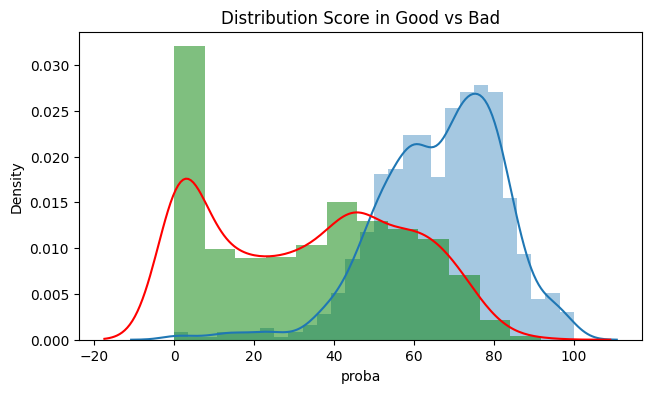

In [310]:
# Show distribution Score of Logistic Regression
show_score(lr)

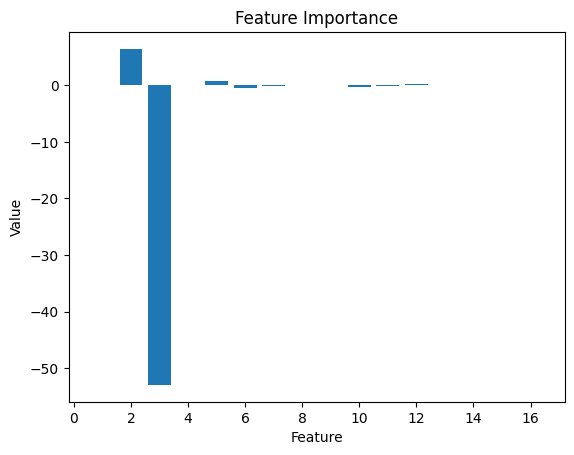

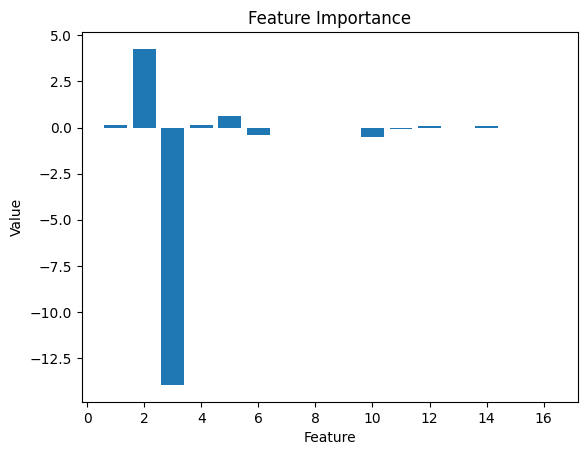

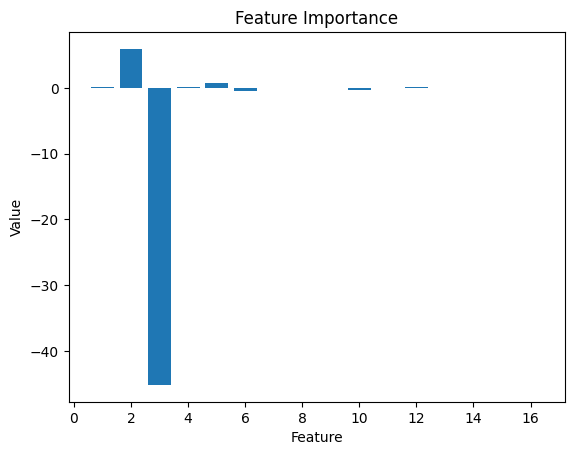

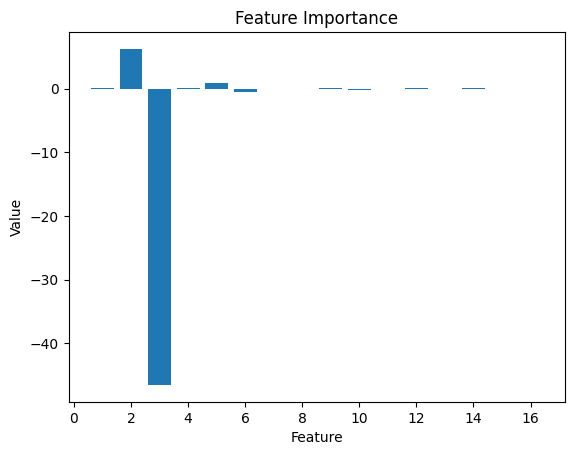

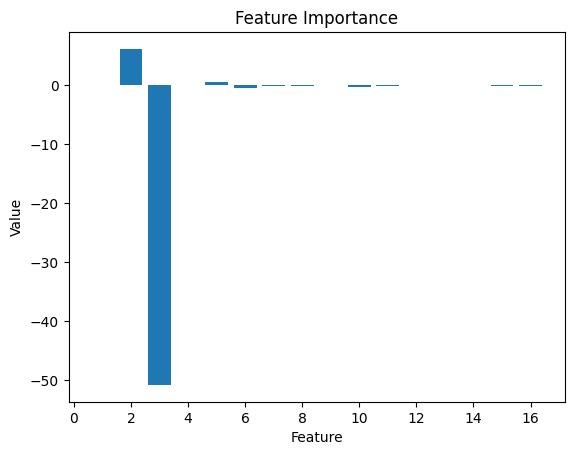

In [311]:
show_feature_importance(lr)

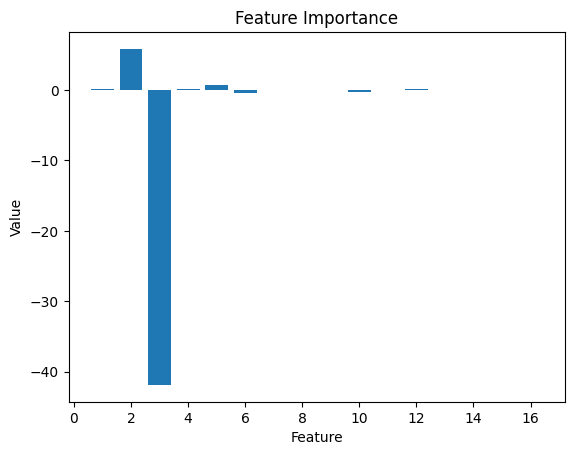

{'Feature1': 0.11213795643625539,
 'Feature2': 5.810256182919277,
 'Feature3': -41.865486772275325,
 'Feature4': 0.09807545707896434,
 'Feature5': 0.7096903758857872,
 'Feature6': -0.4555133005082636,
 'Feature7': -0.07921402095652871,
 'Feature8': -0.016253570863241328,
 'Feature9': 0.017605634972900377,
 'Feature10': -0.2917859420676029,
 'Feature11': -0.0775022076454682,
 'Feature12': 0.11978508398926117,
 'Feature13': 0.0,
 'Feature14': 0.04848005745771254,
 'Feature15': -0.047002030941925364,
 'Feature16': -0.04293062188818012}

In [312]:
avg_feature_importance(lr)

## SVM

In [313]:
svm = np.load('/content/drive/MyDrive/Credit_Scoring/Result Analysis/Modify/Result_Grid/SVM/Results.npy', allow_pickle=True)

<ipython-input-303-6488d7593fd1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[result['y_test']==1]['proba'], label='Good')
<ipython-input-303-6488d7593fd1>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[result['y_test']==0]['proba'], label='Bad',


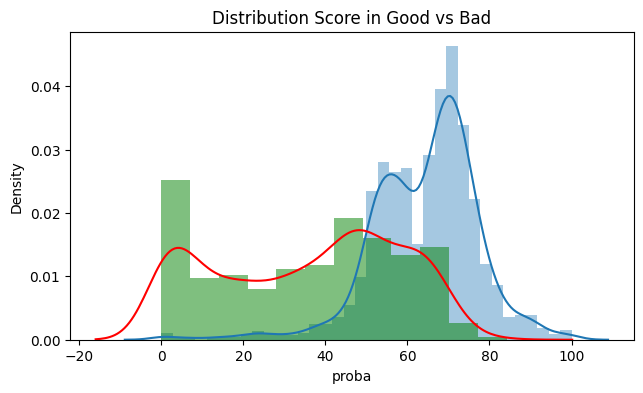

In [314]:
show_score(svm)

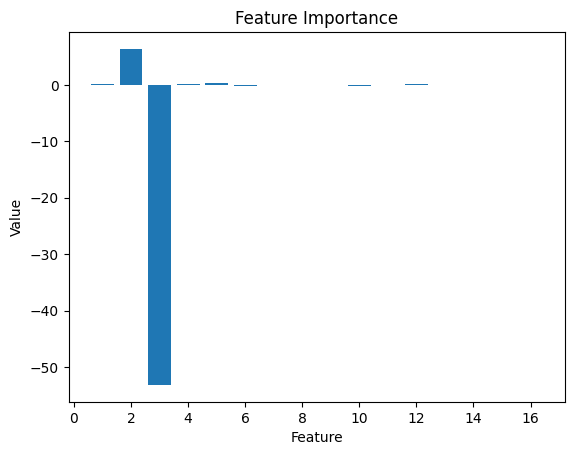

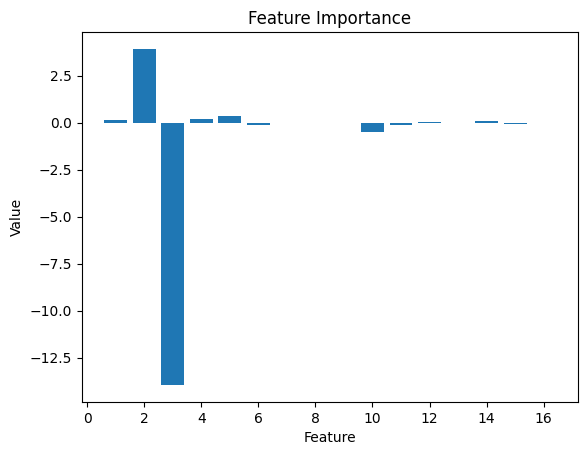

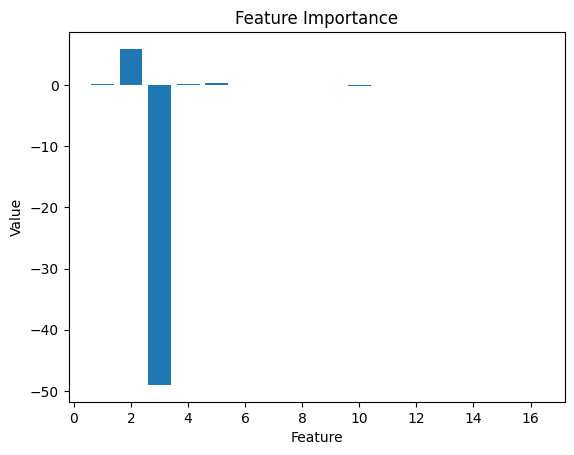

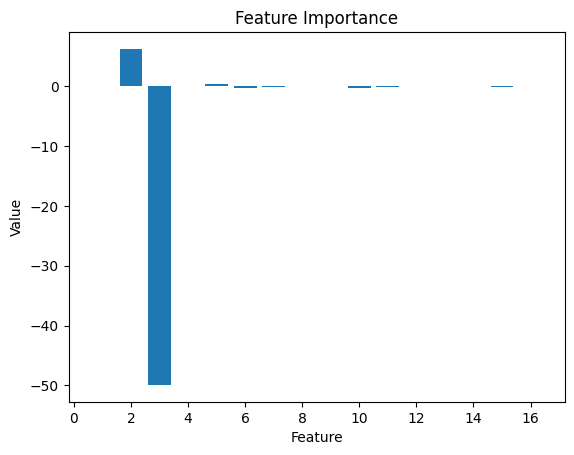

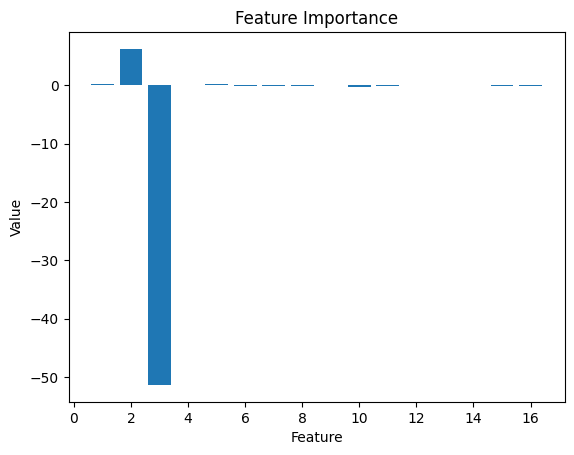

In [315]:
show_feature_importance(svm)

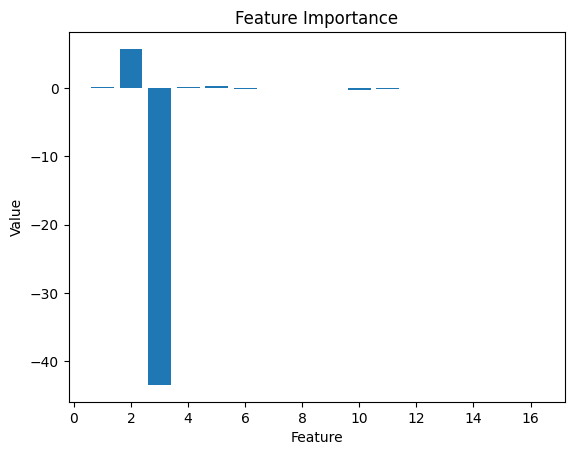

{'Feature1': 0.13861660712180351,
 'Feature2': 5.735776514329723,
 'Feature3': -43.48771366323204,
 'Feature4': 0.11709541850231062,
 'Feature5': 0.33795715334312354,
 'Feature6': -0.13058879445829774,
 'Feature7': -0.03761169981218497,
 'Feature8': -0.03876672038783511,
 'Feature9': 0.00558557528190704,
 'Feature10': -0.27695715576996205,
 'Feature11': -0.07477175172558362,
 'Feature12': 0.049007143071645484,
 'Feature13': 0.0,
 'Feature14': 0.0475740521322507,
 'Feature15': -0.04335508772658727,
 'Feature16': -0.03690416028764787}

In [316]:
avg_feature_importance(svm)

## Random Forest

In [317]:
rf = np.load('/content/drive/MyDrive/Credit_Scoring/Result Analysis/Modify/Result_Grid/RF/Results.npy', allow_pickle=True)

<ipython-input-303-6488d7593fd1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[result['y_test']==1]['proba'], label='Good')
<ipython-input-303-6488d7593fd1>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[result['y_test']==0]['proba'], label='Bad',


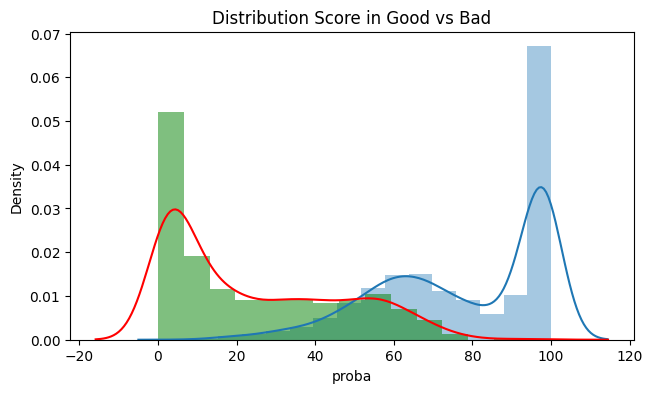

In [318]:
show_score(rf)

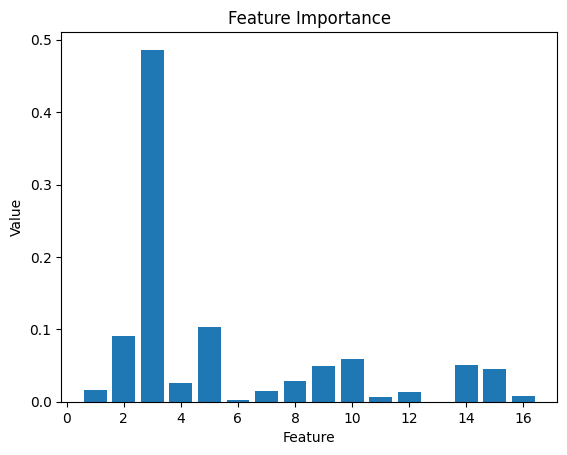

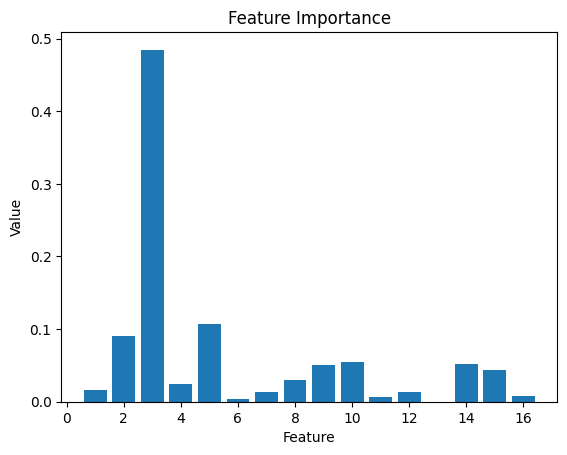

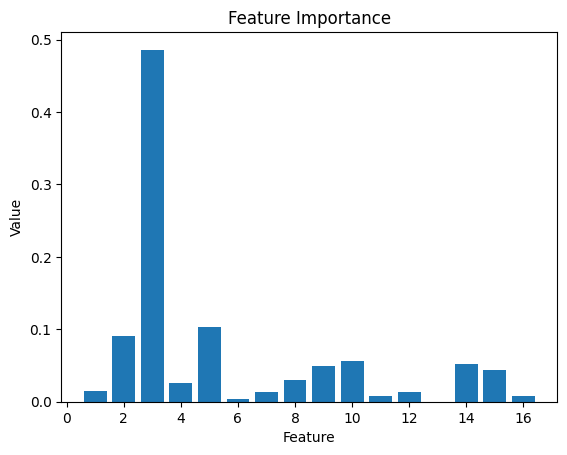

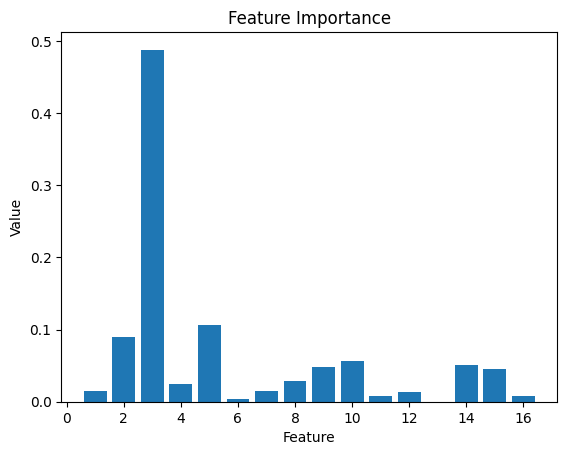

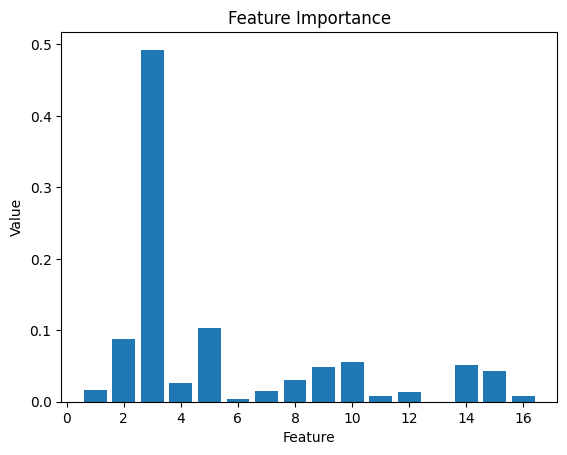

In [319]:
show_feature_importance(rf)

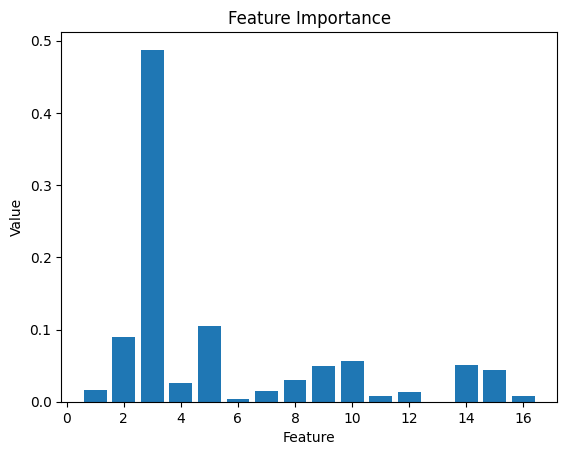

['Feature3',
 'Feature5',
 'Feature2',
 'Feature10',
 'Feature14',
 'Feature9',
 'Feature15',
 'Feature8']

In [320]:
# Average of feature importance
avg_rf = select_features(avg_feature_importance(rf),8)
avg_rf


In [366]:
# Index of feature importance
feature_rf = extract_numbers_from_features(avg_rf)
feature_rf

[3, 5, 2, 10, 14, 9, 15, 8]

## Gradient Boosting

In [322]:
gbc = np.load('/content/drive/MyDrive/Credit_Scoring/Result Analysis/Modify/Result_Grid/GBC/Results.npy', allow_pickle=True)

<ipython-input-303-6488d7593fd1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[result['y_test']==1]['proba'], label='Good')
<ipython-input-303-6488d7593fd1>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[result['y_test']==0]['proba'], label='Bad',


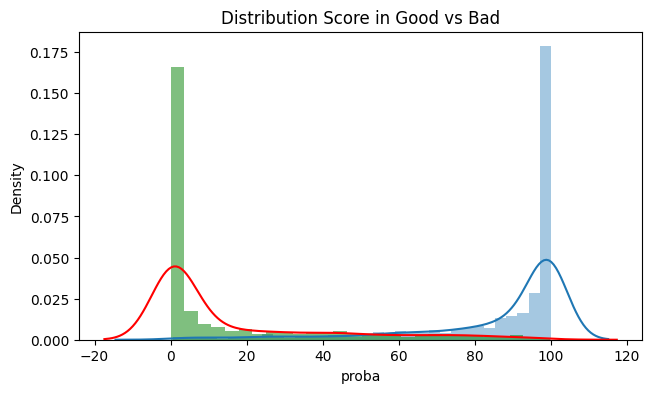

In [323]:
show_score(gbc)

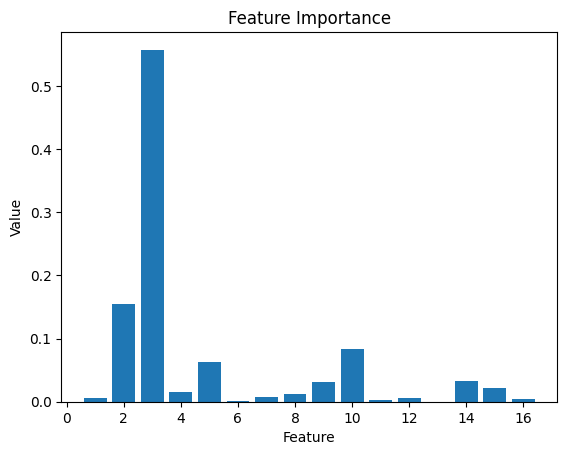

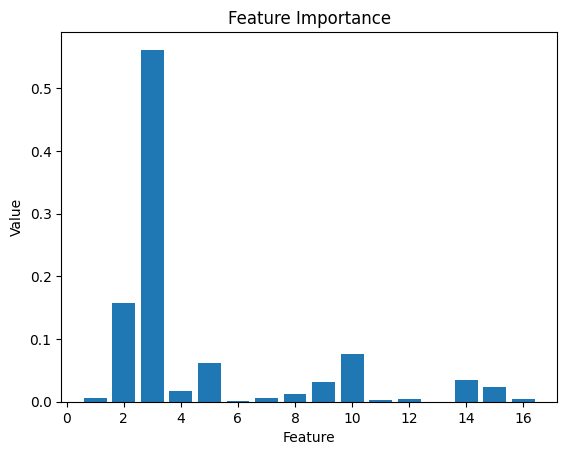

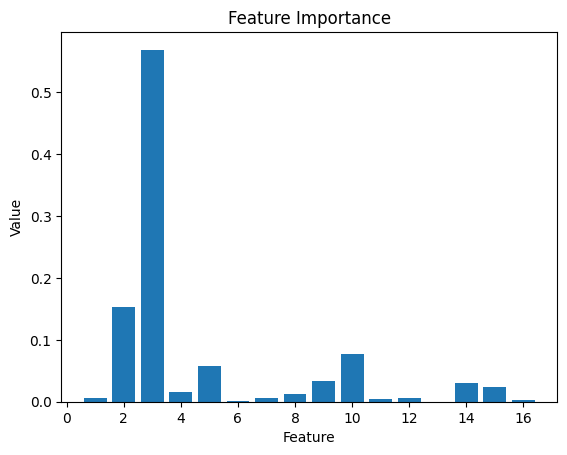

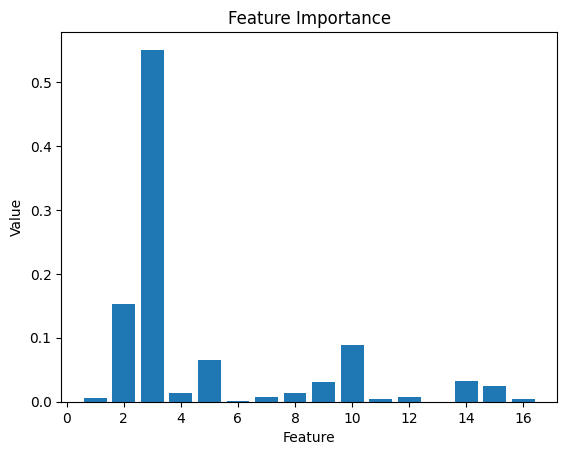

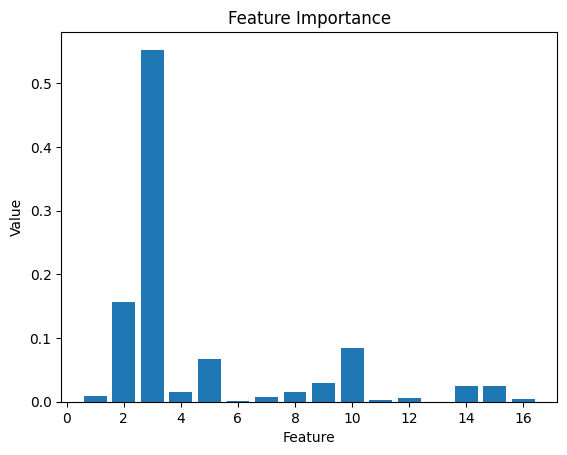

In [324]:
show_feature_importance(gbc)

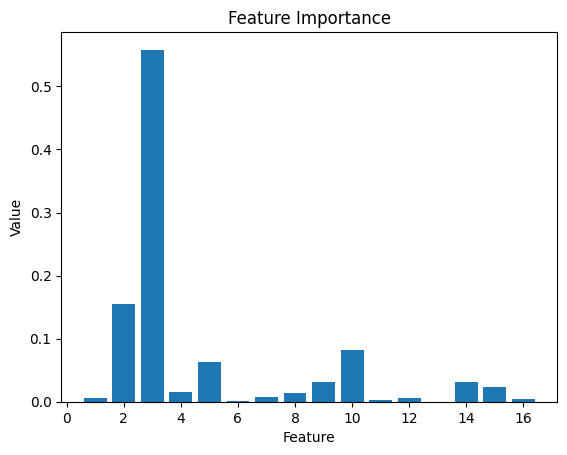

['Feature3',
 'Feature2',
 'Feature10',
 'Feature5',
 'Feature9',
 'Feature14',
 'Feature15',
 'Feature4']

In [325]:
# Average of feature importance
avg_gbc = select_features(avg_feature_importance(gbc),8)
avg_gbc


In [326]:
# Index of feature importance
feature_gbc = extract_numbers_from_features(avg_gbc)
feature_gbc

[3, 2, 10, 5, 9, 14, 15, 4]

## XGBoost

In [327]:
xgb = np.load('/content/drive/MyDrive/Credit_Scoring/Result Analysis/Modify/Result_Grid/XGB/Results.npy', allow_pickle=True)

<ipython-input-303-6488d7593fd1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[result['y_test']==1]['proba'], label='Good')
<ipython-input-303-6488d7593fd1>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[result['y_test']==0]['proba'], label='Bad',


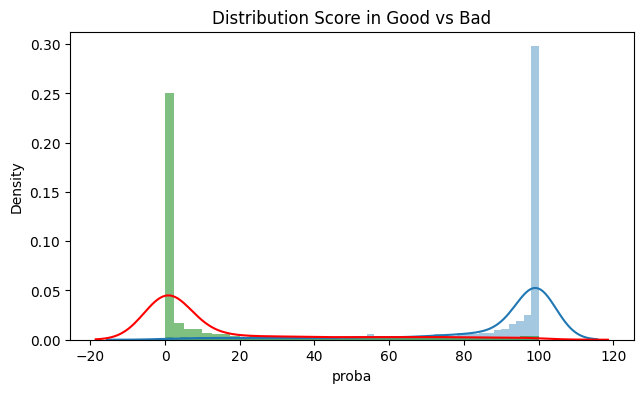

In [328]:
show_score(xgb)

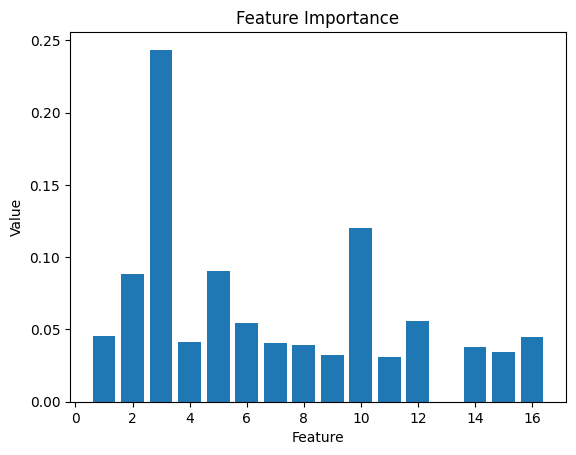

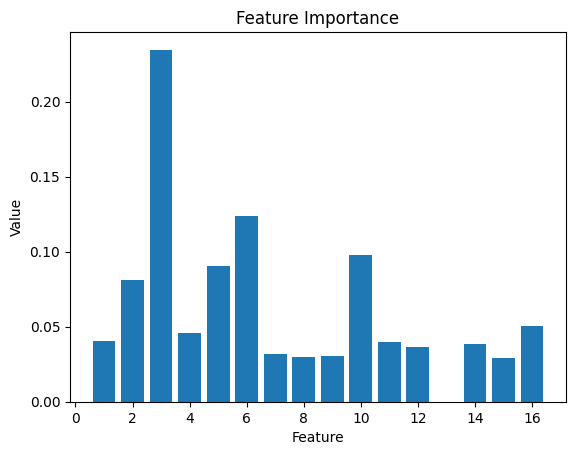

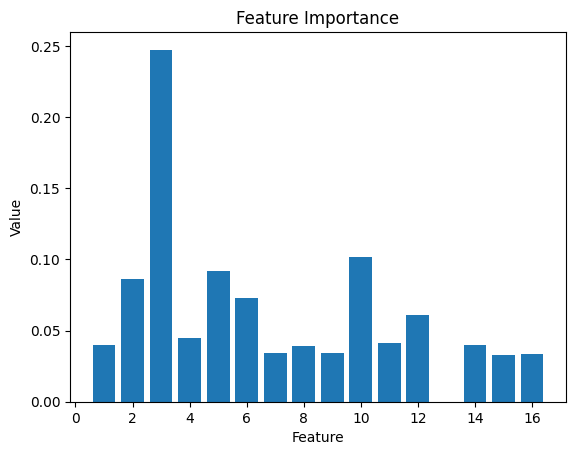

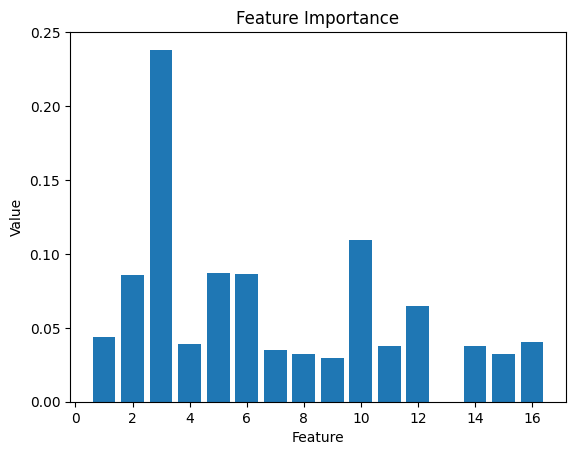

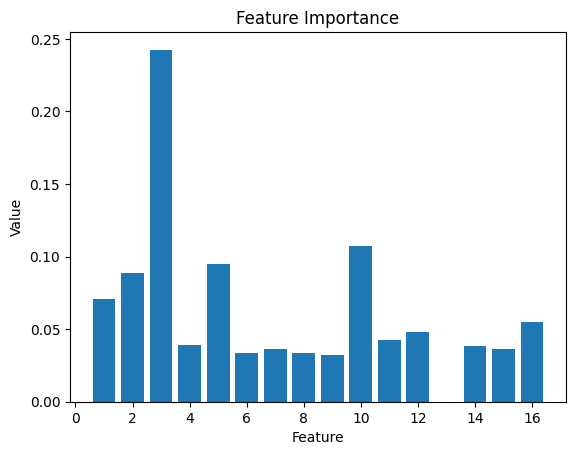

In [329]:
show_feature_importance(xgb)

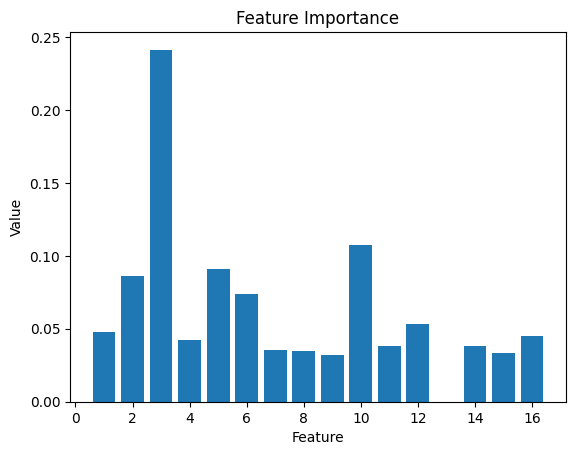

{'Feature1': 0.048084189742803575,
 'Feature2': 0.0859403818845749,
 'Feature3': 0.24121280610561371,
 'Feature4': 0.04220055937767029,
 'Feature5': 0.09087418466806411,
 'Feature6': 0.074113979190588,
 'Feature7': 0.035655426979064944,
 'Feature8': 0.03478616625070572,
 'Feature9': 0.031762534752488136,
 'Feature10': 0.10738242119550705,
 'Feature11': 0.03837288841605187,
 'Feature12': 0.053299131244421004,
 'Feature13': 0.0,
 'Feature14': 0.038358041644096376,
 'Feature15': 0.033195561170578,
 'Feature16': 0.044761684536933896}

In [330]:
avg_feature_importance(xgb)

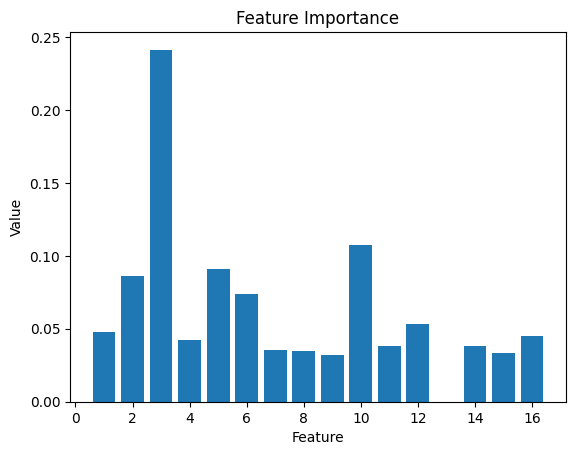

['Feature3',
 'Feature10',
 'Feature5',
 'Feature2',
 'Feature6',
 'Feature12',
 'Feature1',
 'Feature16']

In [331]:
# Average of feature importance
avg_xgb = select_features(avg_feature_importance(xgb),8)
avg_xgb


In [332]:

# Index of feature importance
feature_xgb = extract_numbers_from_features(avg_xgb)
feature_xgb

[3, 10, 5, 2, 6, 12, 1, 16]

## CatBoost

In [333]:
cat = np.load('/content/drive/MyDrive/Credit_Scoring/Result Analysis/Modify/Result_Grid/CAT/Results.npy', allow_pickle=True)

<ipython-input-303-6488d7593fd1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[result['y_test']==1]['proba'], label='Good')
<ipython-input-303-6488d7593fd1>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[result['y_test']==0]['proba'], label='Bad',


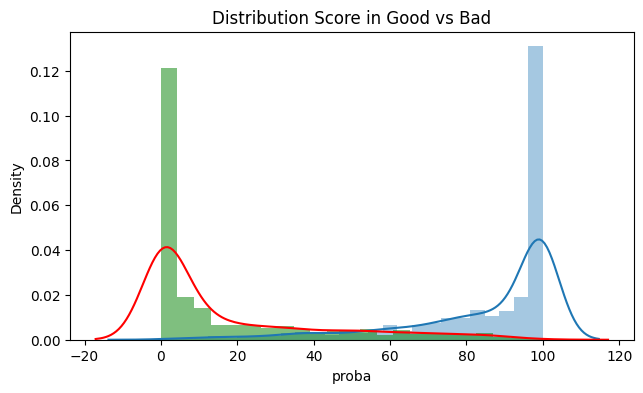

In [334]:
show_score(cat)

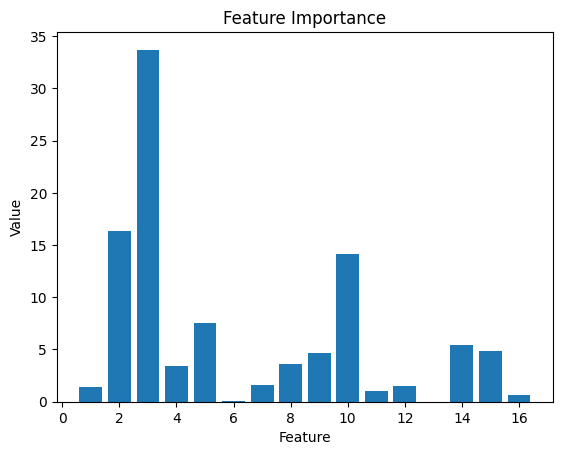

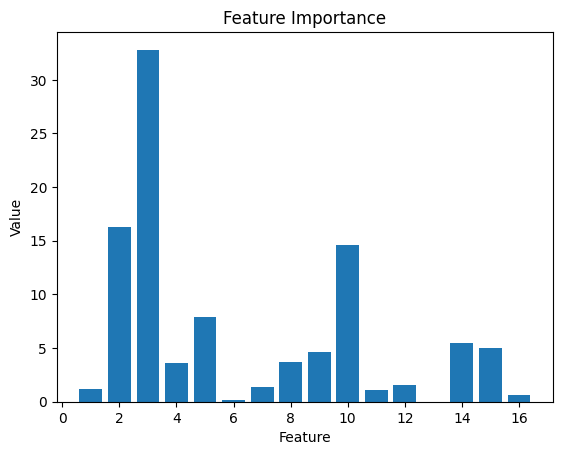

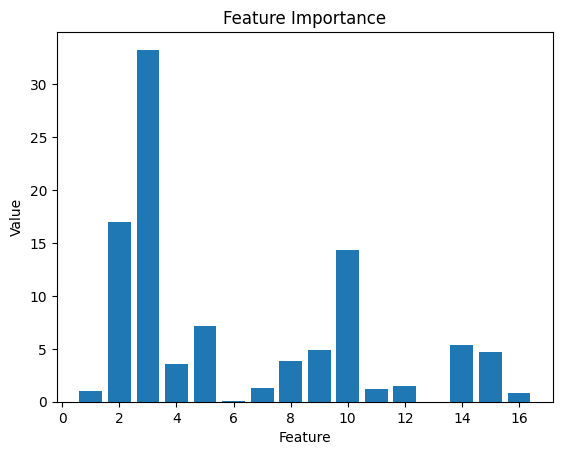

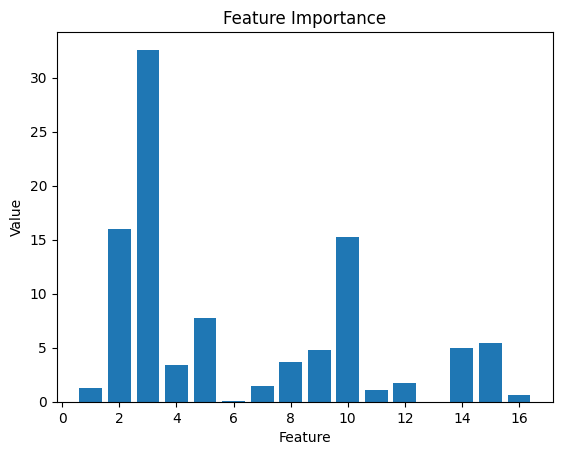

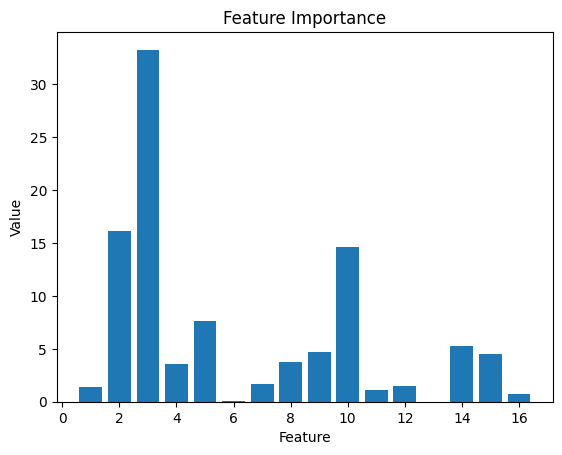

In [335]:
show_feature_importance(cat)

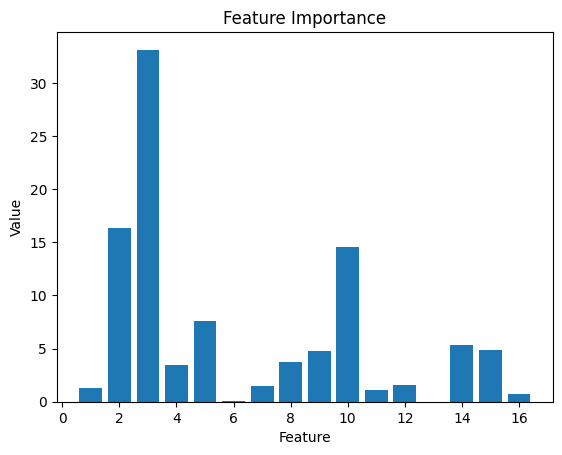

{'Feature1': 1.2450003344805383,
 'Feature2': 16.33274563313301,
 'Feature3': 33.12800121483184,
 'Feature4': 3.4978010960915404,
 'Feature5': 7.575466042003849,
 'Feature6': 0.09213684913151747,
 'Feature7': 1.4843183782141747,
 'Feature8': 3.714477098201589,
 'Feature9': 4.749961185621769,
 'Feature10': 14.604798148239627,
 'Feature11': 1.117745214704542,
 'Feature12': 1.5642484581988083,
 'Feature13': 0.0,
 'Feature14': 5.298973084306953,
 'Feature15': 4.9136186583518775,
 'Feature16': 0.6807086044883536}

In [336]:
avg_feature_importance(cat)

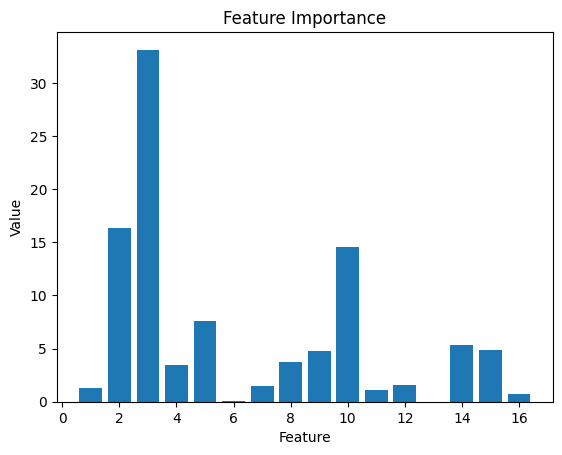

['Feature3',
 'Feature2',
 'Feature10',
 'Feature5',
 'Feature14',
 'Feature15',
 'Feature9',
 'Feature8']

In [337]:
# Average of feature importance
avg_cat = select_features(avg_feature_importance(cat),8)
avg_cat

In [338]:
# Index of feature importance
feature_cat = extract_numbers_from_features(avg_cat)
feature_cat

[3, 2, 10, 5, 14, 15, 9, 8]

#Training Model

In [339]:
loan = pd.read_csv('/content/drive/MyDrive/Credit_Scoring/Result Analysis/loan_fn.csv')
loan.head()

CUSTOMERID    CUSTOMER_TYPE  CATEGORYID  \
0 1256754.000  Single Customer    1067.000   
1 1617517.000  Single Customer    1067.000   
2 1308040.000  Single Customer    1067.000   
3 1384971.000  Single Customer    1067.000   
4 1660930.000  Single Customer    1067.000   

                                 CATNAME            CRD_PURPOSE  \
0  Hire Purchase (Upfront Method) Int 7%  Electronic Equipments   
1  Hire Purchase (Upfront Method) Int 7%  Electronic Equipments   
2  Hire Purchase (Upfront Method) Int 7%  Electronic Equipments   
3  Hire Purchase (Upfront Method) Int 7%  Electronic Equipments   
4  Hire Purchase (Upfront Method) Int 7%  Electronic Equipments   

       CRD_CLASSIFICATION    CRLIMIT            BRNAME     DEALER_NAME  \
0  Agriculture/Livestocks 413700.000  0001-Nay Pyi Taw  Wellcom Mobile   
1  Agriculture/Livestocks 595000.000  0001-Nay Pyi Taw  Wellcom Mobile   
2  Agriculture/Livestocks 560000.000  0001-Nay Pyi Taw  Wellcom Mobile   
3  Agriculture/Livestocks 559300.000  0001-Nay Pyi Taw  Wellcom Mobile   
4  Agriculture/Livestocks 707000.000  0001-Nay Pyi Taw  Wellcom Mobile   

    PRINTAMT  Down_payment%  ntransaction_l12m MARTIAL_STATUS  nopen_account  \
0 137840.130         30.000              7.000        Unknown          1.000   
1 198289.800         30.000              7.000         Single          1.000   
2 186437.350         30.000              7.000         Single          1.000   
3 202874.530         30.000              7.000         Single          1.000   
4 256884.950         30.000              7.000         Single          1.000   

   nclose_account  state    Age  good_bad  Duration  
0           0.000      5 26.000         0    12.000  
1           0.000     13 27.000         0    12.000  
2           0.000     12 46.000         0    12.000  
3           0.000      9 22.000         0    11.000  
4           0.000     12 34.000         0    11.000

In [340]:
loan.drop(['CATNAME'], axis=1, inplace=True)

## 1. Encoding all the categocical columns

In [341]:
def select_columns_by_index(df, selected_indices):
    selected_columns = df.iloc[:, selected_indices]
    return selected_columns

In [342]:
# filter categorical data fields
categorical_cols = loan.select_dtypes(include=['object']).columns.to_list()

# display a list of categorical data fields
print('Categorical columns: ', categorical_cols)

# Apply LabelEncoder to each column of type categorical
for col in categorical_cols:
    new_col_name = col + '_label'
    le = LabelEncoder()
    loan[new_col_name] = le.fit_transform(loan[col])

# Display data after applying LabelEncoder
#loan.head()

# delete categorical columms
loan = loan.drop(categorical_cols, axis=1)

Categorical columns:  ['CUSTOMER_TYPE', 'CRD_PURPOSE', 'CRD_CLASSIFICATION', 'BRNAME', 'DEALER_NAME', 'MARTIAL_STATUS']


In [343]:
loan.columns

Index(['CUSTOMERID', 'CATEGORYID', 'CRLIMIT', 'PRINTAMT', 'Down_payment%',
       'ntransaction_l12m', 'nopen_account', 'nclose_account', 'state', 'Age',
       'good_bad', 'Duration', 'CUSTOMER_TYPE_label', 'CRD_PURPOSE_label',
       'CRD_CLASSIFICATION_label', 'BRNAME_label', 'DEALER_NAME_label',
       'MARTIAL_STATUS_label'],
      dtype='object')

In [344]:
#Divide the data into two small sets of bad debt and good debt
bad_loans = loan[loan['good_bad'] == 0].copy()
good_loans = loan[loan['good_bad'] == 1].copy()

In [345]:
# Split data
X_good = good_loans.drop(['good_bad']  , axis = 1)
y_good = good_loans['good_bad']

X_bad = bad_loans.drop(['good_bad']  , axis = 1)
y_bad = bad_loans['good_bad']

x_train_g , x_test_g , y_train_g , y_test_g = train_test_split( X_good, y_good , test_size = 0.2 , random_state = 42)
x_train_b , x_test_b , y_train_b , y_test_b = train_test_split(X_bad , y_bad , test_size = 0.2 , random_state = 42)

# Merge data training
X_train = pd.concat([x_train_g,x_train_b])
y_train = pd.concat([y_train_g,y_train_b])

# Merge data testing 
X_test = pd.concat([x_test_g,x_test_b])
y_test = pd.concat([y_test_g,y_test_b])


## Select Data of each model

In [346]:
import os
os.chdir('/content/drive/MyDrive/Credit_Scoring/Result Analysis/')

In [361]:
id = 0

Random Forest

In [367]:
feature_rf.append(id)
X_train_rf = select_columns_by_index(X_train, feature_rf)
X_test_rf = select_columns_by_index(X_test, feature_rf)

In [368]:
A = {'X_test': X_test_rf,
     'y_test': y_test}
np.save('Result/test_rf.npy', A)

Gradient Boosting

In [369]:
feature_gbc.append(id)
X_train_gbc = select_columns_by_index(X_train, feature_gbc)
X_test_gbc = select_columns_by_index(X_test, feature_gbc)

In [370]:
A = {'X_test': X_test_gbc,
     'y_test': y_test}
np.save('Result/test_gbc.npy', A)

XGBoost

In [371]:
feature_xgb.append(id)
X_train_xgb = select_columns_by_index(X_train, feature_xgb)
X_test_xgb = select_columns_by_index(X_test, feature_xgb)

In [372]:
A = {'X_test': X_test_xgb,
     'y_test': y_test}
np.save('Result/test_xgb.npy', A)

CatBoost

In [373]:
feature_cat.append(id)
X_train_cat = select_columns_by_index(X_train, feature_cat)
X_test_cat = select_columns_by_index(X_test, feature_cat)

In [374]:
A = {'X_test': X_test_cat,
     'y_test': y_test}
np.save('Result/test_cat.npy', A)

#  Training machine learning models by 5-fold cross-validation technique

In [375]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

def compute_scores(y_true, y_pred, show = None):
    b_acc = np.round(balanced_accuracy_score(y_true, y_pred)*100, 2)

    # Determine True Negative (TN), True Positive (TP), Faux Negative (FN), Faux Positive (FP) 
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()

    # Specificity 
    spe = np.round(TN/(TN + FP)*100, 2) 
    # Sensitivity
    sen = np.round(TP/(TP + FN)*100, 2)

    return b_acc, spe, sen

def training_GS(model, params, model_name, X_train, y_train, X_test, y_test, rst_path, print_scores = None, plot_ROC = None):
    model_path = rst_path + model_name + '/'
    os.mkdir(model_path)

    B_acc = []
    Spe = []
    Sen = []
    Best_params = {}
    Feature_importance = {}
    
    X_train = X_train.drop(columns = ['CUSTOMERID'], axis = 1)
    ID_test = list(X_test['CUSTOMERID'])
    X_test = X_test.drop(columns = ['CUSTOMERID'], axis = 1)

    X_test = np.array(X_test)
    y_test = np.array(y_test)

    # create a dataframe to save the test results
    df_test = pd.DataFrame()
    df_test['ID_test'] = ID_test
    df_test['y_test'] = y_test

    i = 0
    for train_index, val_index in skf.split(X_train, y_train):
        i = i + 1 
        print('Fold_' + str(i))
        # Choose 4 sets as training set and 1 set as validation set
        X_train_, X_val_ = X_train.iloc[train_index,:], X_train.iloc[val_index,:]
        y_train_, y_val_ = y_train.iloc[train_index], y_train.iloc[val_index]

        X_train_ = np.array(X_train_)
        y_train_ = np.array(y_train_)
        X_val_ = np.array(X_val_)
        y_val_ = np.array(y_val_)
        
        # Normalization training/validation/test sets
        scaler = StandardScaler()
        X_train_scaler = scaler.fit_transform(X_train_)
        X_val_scaler = scaler.transform(X_val_)
        X_test_scaler = scaler.transform(X_test)

        # Balancing the training set
        ros = RandomOverSampler(random_state = 42)
        X_train_rs, y_train_rs = ros.fit_resample(X_train_scaler, y_train_)

        if model_name == 'SVM':
          grid_model = SVC(probability = True)
        else:
          grid_model = model()
        grid_search = GridSearchCV(estimator = grid_model,
                                  param_grid = params,
                                  verbose = 0)
        
        grid_search.fit(X_train_rs, y_train_rs)
        best_train_score = grid_search.best_score_
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
        Best_params['fold_' + str(i)] = best_params

        # all scores on val set
        y_val_pred = grid_search.predict(X_val_scaler)
        b_acc, spe, sen = compute_scores(y_val_, y_val_pred)
        B_acc.append(b_acc)
        Spe.append(spe)
        Sen.append(sen)

        # Prediction of the i^th sub-model on the test set
        proba_test_pred = grid_search.predict_proba(X_test_scaler)
        # save the probability that observations belonging to the positive class
        df_test['proba_' + str(i)] = proba_test_pred[:,1]

        # plot roc curve
        if plot_ROC:
          fpr, tpr, thres = roc_curve(y_test, proba_test_pred[:,1])
          roc_auc = auc(fpr, tpr)
          _plot_roc_curve(fpr, tpr, thres, roc_auc)

    # Update scores on the validation set
    Scores_val = {}
    Scores_val['B_acc'] = B_acc
    Scores_val['Spe'] = Spe
    Scores_val['Sen'] = Sen

    # Evaluate the customer credit scores based on the predicted probability values
    ind_1 = df_test.columns.get_loc('proba_1')
    df_test['proba_sum'] = df_test.iloc[:,ind_1:(ind_1+5)].sum(axis = 1)
    df_test['proba'] = df_test['proba_sum']/5 
    df_test['y_pred'] = df_test['proba'].apply(lambda x: 1 if x >= 0.5 else 0)
    b_acc, spe, sen = compute_scores(df_test['y_test'], df_test['y_pred'])
    Scores_test = {}
    Scores_test['B_acc'] = b_acc
    Scores_test['Spe'] = spe
    Scores_test['Sen'] = sen

    if print_scores:
      print('Validation: ')
      print('B_acc: ', np.round(np.mean(Scores_val['B_acc']),1), '----------- std: ', np.round(np.std(Scores_val['B_acc']), 1))
      print('Spe: ', np.round(np.mean(Scores_val['Spe']),1), '----------- std: ', np.round(np.std(Scores_val['Spe']), 1)) 
      print('Sen: ', np.round(np.mean(Scores_val['Sen']),1), '----------- std: ', np.round(np.std(Scores_val['Sen']), 1)) 

      print('Test: ')
      print('B_acc: ', np.round(np.mean(Scores_test['B_acc']),1))
      print('Spe: ', np.round(np.mean(Scores_test['Spe']),1)) 
      print('Sen: ', np.round(np.mean(Scores_test['Sen']),1)) 

    # Save the results 
    Results = {}
    Results['Scores_val'] = Scores_val
    Results['Scores_test'] = Scores_test
    Results['df_test'] = df_test
    Results['Best_params'] = Best_params
    np.save(model_path + 'Results.npy', Results)
    return Scores_val, Scores_test, df_test
    

Random Forest

In [376]:
# split the data into 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# from 5 folds are divided, choose 4 folds as training set and 1 fold as test set
for train_index, val_index in skf.split(X_train_rf, y_train):
    X_train_, X_val_ = X_train.iloc[train_index,:], X_train.iloc[val_index,:]
    y_train_, y_val_ = y_train.iloc[train_index], y_train.iloc[val_index]
    print(y_train_.value_counts())
    print(y_val_.value_counts())

1    5107
0    4195
Name: good_bad, dtype: int64
1    1277
0    1049
Name: good_bad, dtype: int64
1    5107
0    4195
Name: good_bad, dtype: int64
1    1277
0    1049
Name: good_bad, dtype: int64
1    5107
0    4195
Name: good_bad, dtype: int64
1    1277
0    1049
Name: good_bad, dtype: int64
1    5107
0    4196
Name: good_bad, dtype: int64
1    1277
0    1048
Name: good_bad, dtype: int64
1    5108
0    4195
Name: good_bad, dtype: int64
1    1276
0    1049
Name: good_bad, dtype: int64


In [377]:
rst_path_ = 'Result_Grid/'
if not os.path.exists(rst_path_):
    os.makedirs(rst_path_)

In [394]:
X_train_rf

PRINTAMT  ntransaction_l12m      CRLIMIT  Duration  BRNAME_label  \
12667  890575.450              7.000 21690000.000    60.000           140   
10371       0.000              8.000 17150000.000    36.000           100   
9695        0.000              6.000 25380000.000    61.000            75   
8044        0.000              9.000 24480000.000    60.000            42   
11613       0.000              5.000   860300.000    12.000           125   
...           ...                ...          ...       ...           ...   
3772  2805314.140              7.000 49954176.110    59.000           107   
5191   334555.550              3.000 17700000.000    49.000           137   
5226  3058207.380             10.000 44129400.000    60.000           138   
5390  3946219.690              3.000 31500000.000    60.000           139   
860   1304746.300             11.000 20538000.000    60.000            28   

         Age  DEALER_NAME_label  state  CUSTOMERID  
12667 31.000                109      1 1985245.000  
10371 41.000                 58     14   41545.000  
9695  44.000                 98     12  245350.000  
8044  32.000                109     12 1159814.000  
11613 29.000                  4      7  863542.000  
...      ...                ...    ...         ...  
3772  40.000                 79     12  864323.000  
5191  31.000                 41      1  801869.000  
5226  46.000                 72      9 1682211.000  
5390  31.000                 80      9  241172.000  
860   46.000                  0     12  276246.000  

[11628 rows x 9 columns]

Fold_1


<ipython-input-375-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-375-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_2


<ipython-input-375-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-375-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_3


<ipython-input-375-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-375-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_4


<ipython-input-375-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-375-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_5


<ipython-input-375-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-375-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Validation: 
B_acc:  84.0 ----------- std:  0.3
Spe:  80.1 ----------- std:  0.8
Sen:  87.8 ----------- std:  0.9
Test: 
B_acc:  85.4
Spe:  82.2
Sen:  88.6


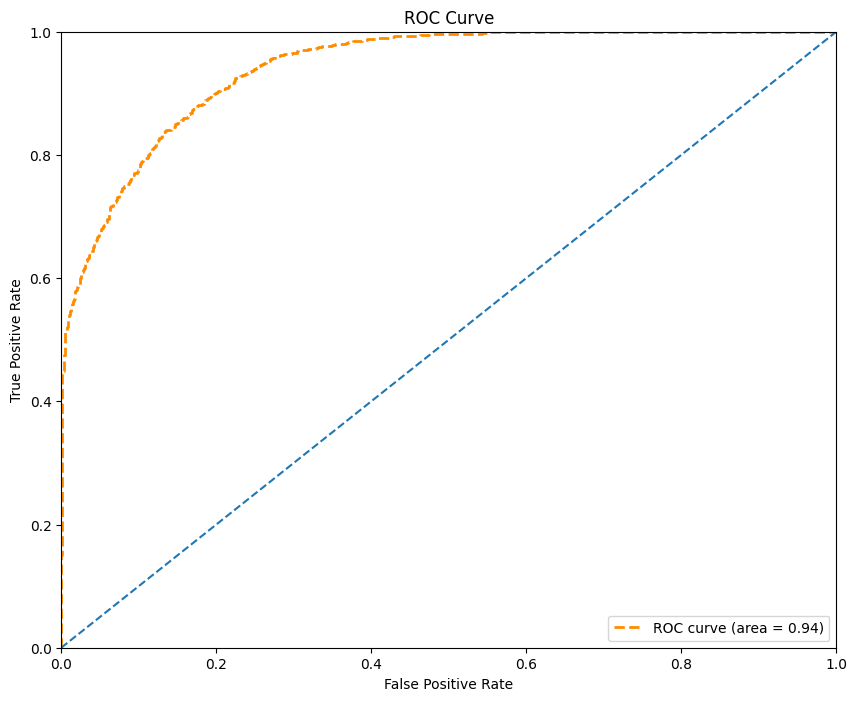

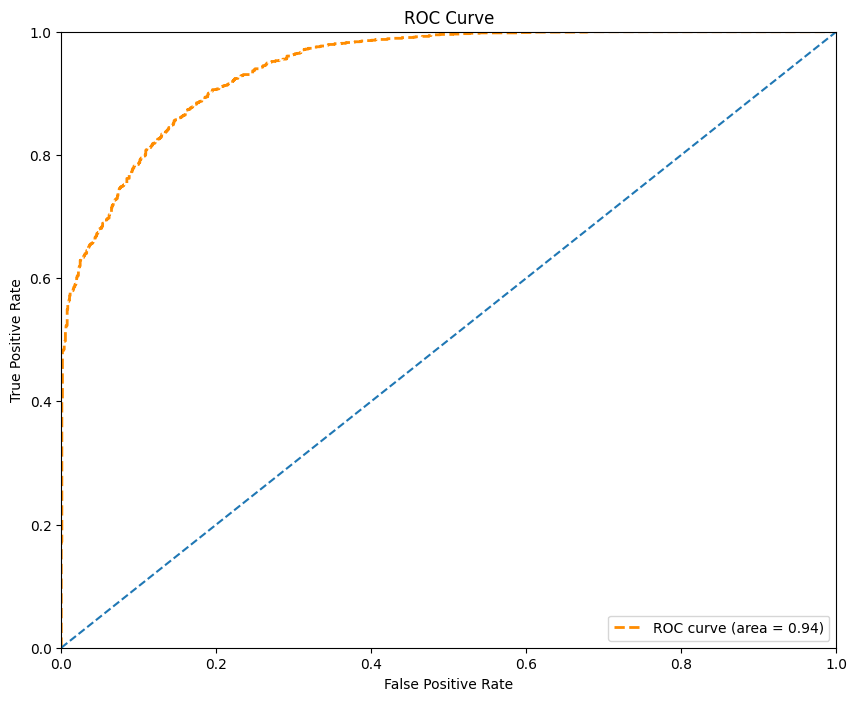

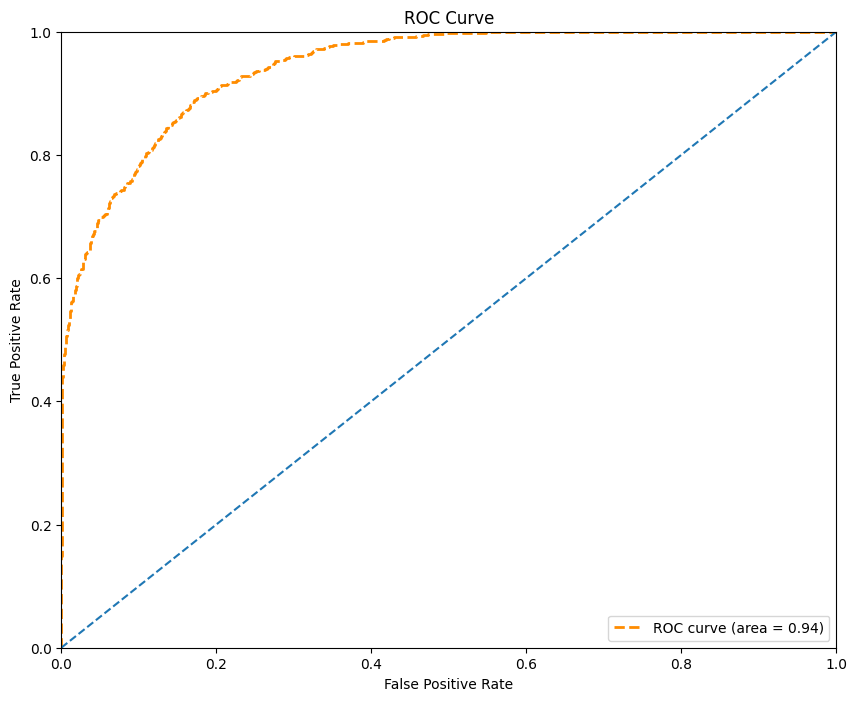

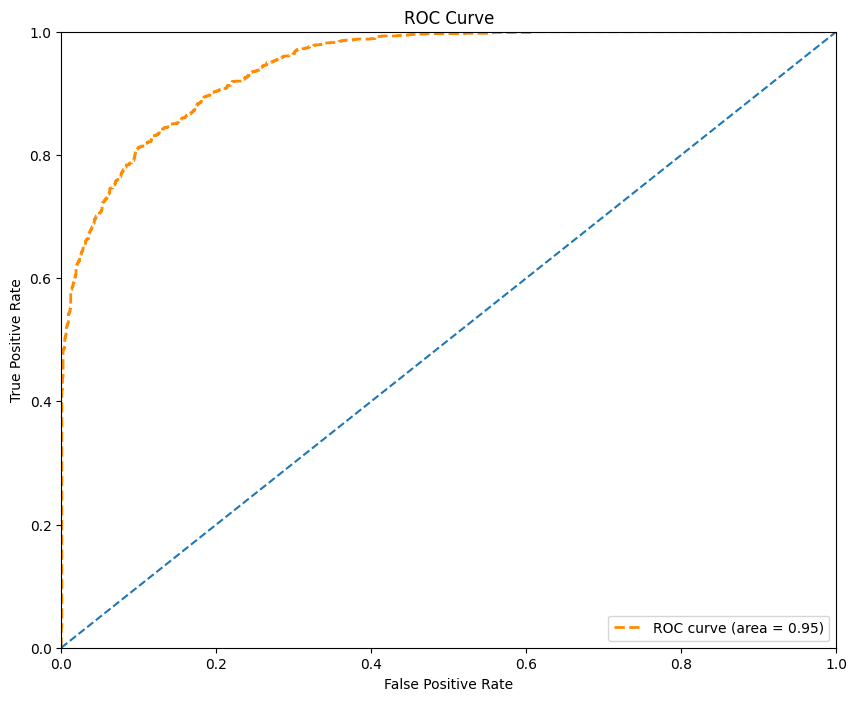

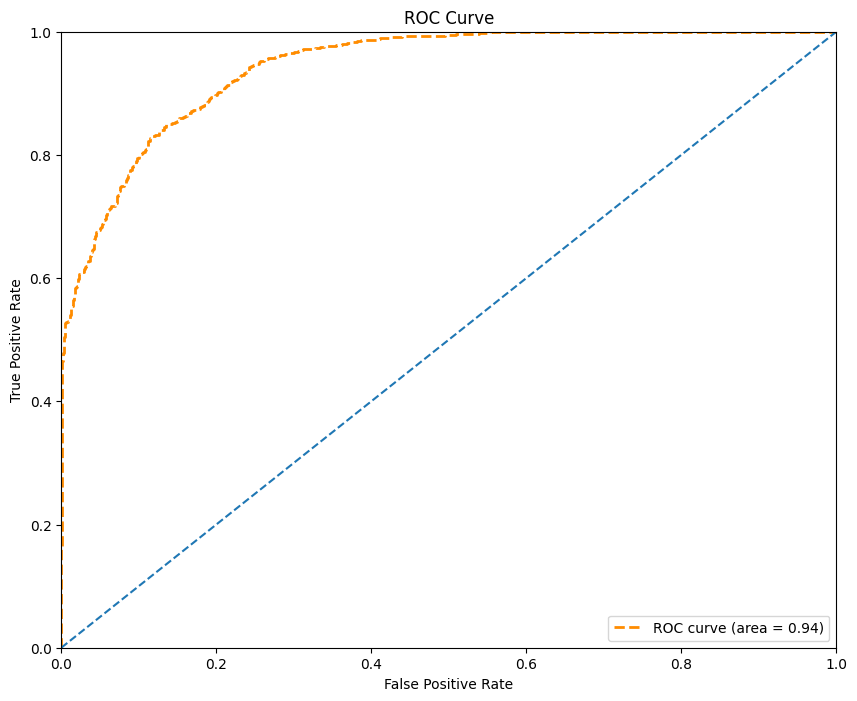

In [380]:
RF_model = RandomForestClassifier
RF_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15]
}

Rst_RF = training_GS(RF_model, RF_params, model_name = 'RF', X_train = X_train_rf, y_train = y_train, 
                      X_test = X_test_rf, y_test = y_test, rst_path = rst_path_, print_scores = True, plot_ROC = True)

XGBoost

In [393]:
X_train_xgb

PRINTAMT  Duration  ntransaction_l12m      CRLIMIT  nopen_account  \
12667  890575.450    60.000              7.000 21690000.000          1.000   
10371       0.000    36.000              8.000 17150000.000          1.000   
9695        0.000    61.000              6.000 25380000.000          1.000   
8044        0.000    60.000              9.000 24480000.000          1.000   
11613       0.000    12.000              5.000   860300.000          1.000   
...           ...       ...                ...          ...            ...   
3772  2805314.140    59.000              7.000 49954176.110          1.000   
5191   334555.550    49.000              3.000 17700000.000          1.000   
5226  3058207.380    60.000             10.000 44129400.000          1.000   
5390  3946219.690    60.000              3.000 31500000.000          1.000   
860   1304746.300    60.000             11.000 20538000.000          1.000   

       CRD_PURPOSE_label  CATEGORYID  MARTIAL_STATUS_label  CUSTOMERID  
12667                  7    1072.000                     3 1985245.000  
10371                  7    1072.000                     3   41545.000  
9695                   7    1072.000                     3  245350.000  
8044                   7    1083.000                     3 1159814.000  
11613                  3    1086.000                     3  863542.000  
...                  ...         ...                   ...         ...  
3772                   7    1083.000                     3  864323.000  
5191                   7    1072.000                     3  801869.000  
5226                   0    1083.000                     3 1682211.000  
5390                   7    1083.000                     3  241172.000  
860                    7    1083.000                     3  276246.000  

[11628 rows x 9 columns]

Fold_1


<ipython-input-375-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-375-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_2


<ipython-input-375-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-375-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_3


<ipython-input-375-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-375-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_4


<ipython-input-375-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-375-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_5


<ipython-input-375-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-375-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Validation: 
B_acc:  88.4 ----------- std:  0.5
Spe:  86.2 ----------- std:  0.7
Sen:  90.7 ----------- std:  0.8
Test: 
B_acc:  88.8
Spe:  88.4
Sen:  89.2


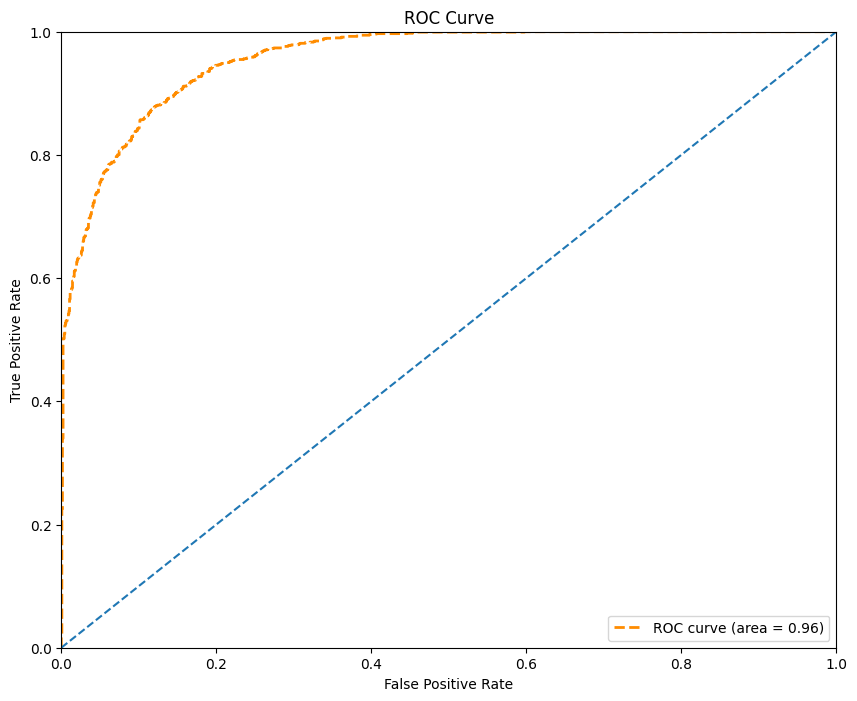

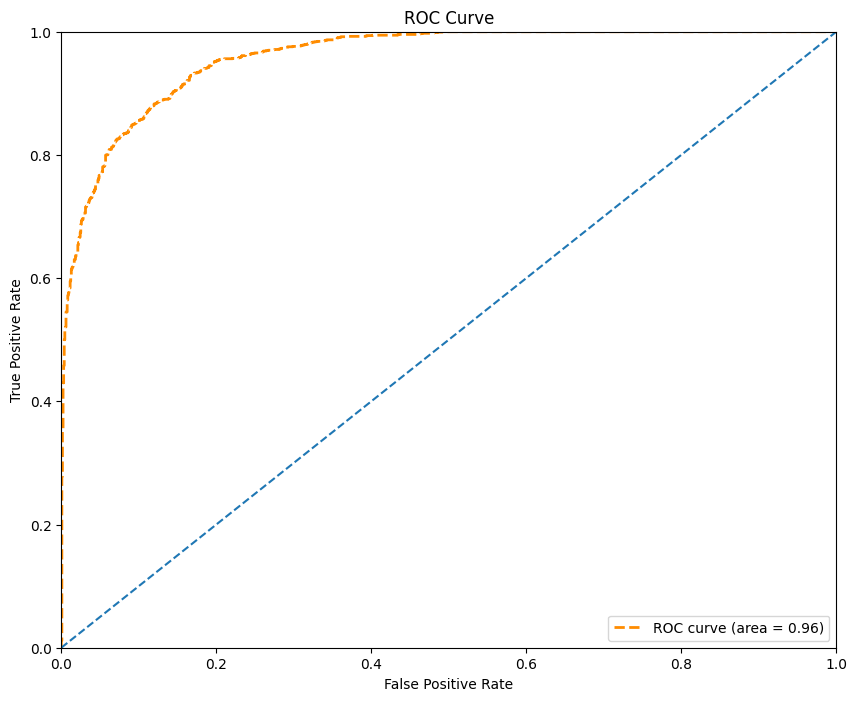

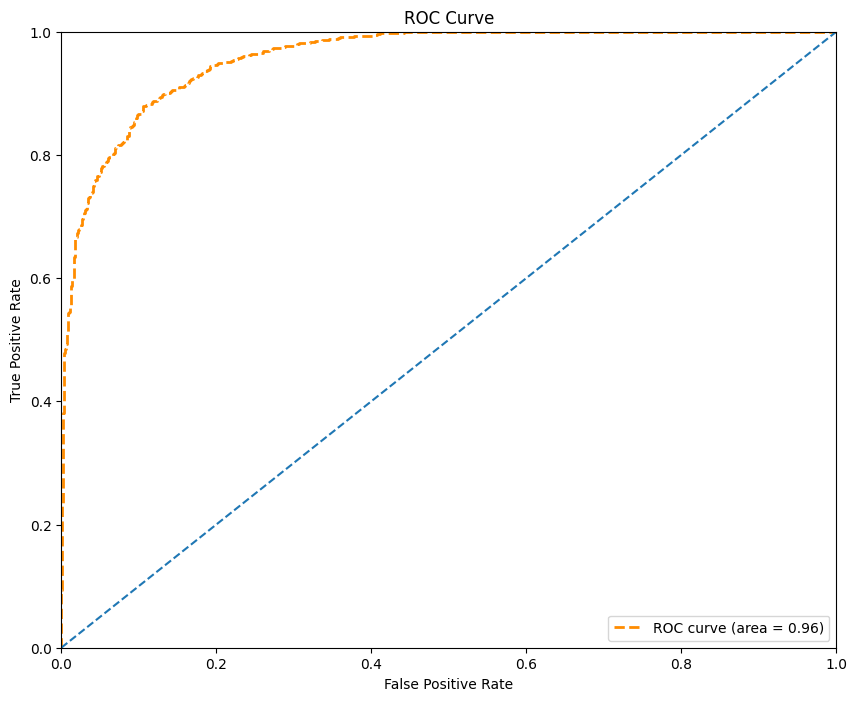

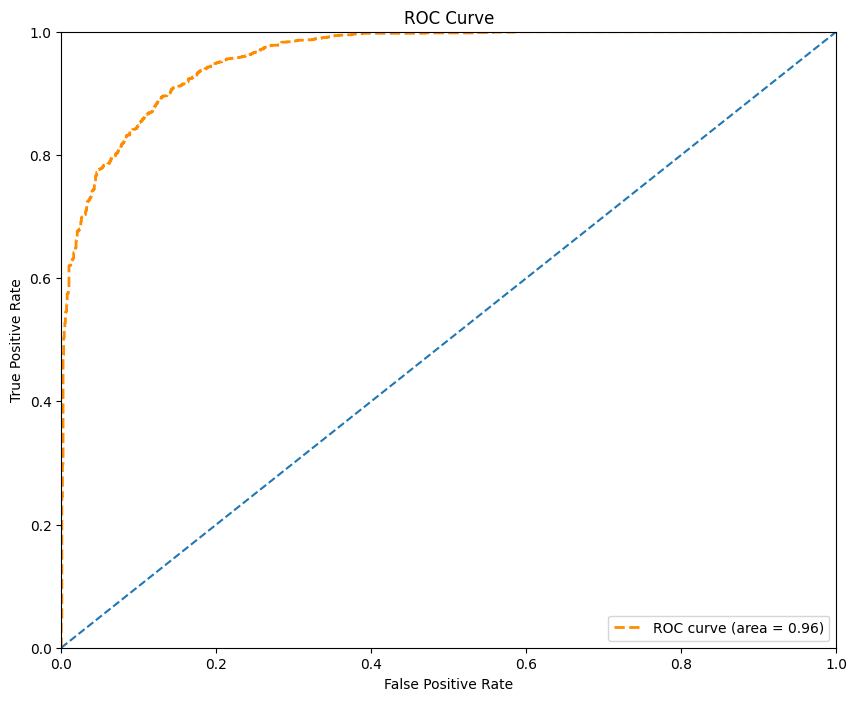

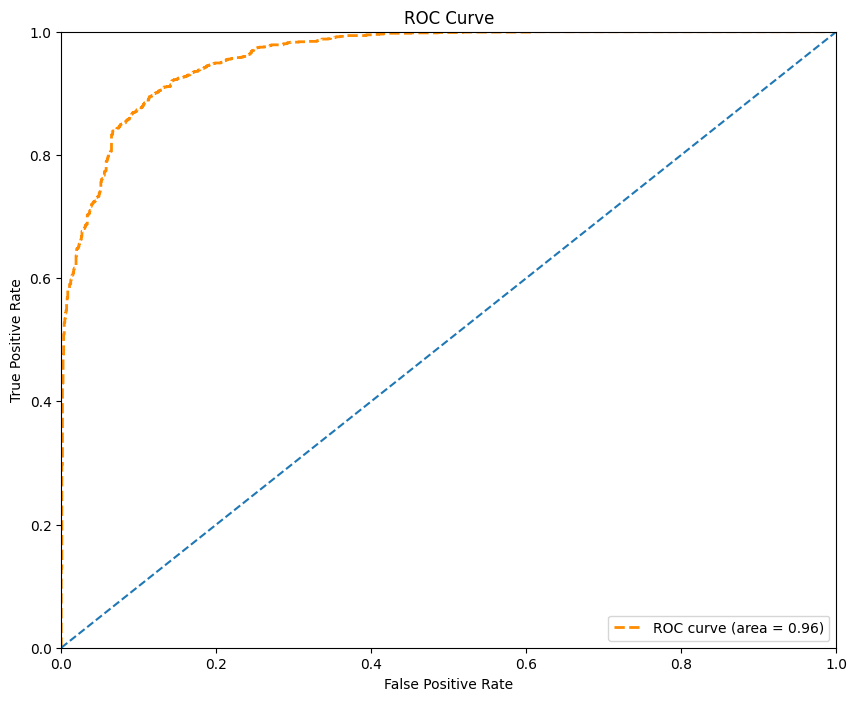

In [382]:
XGB_model = XGBClassifier
XGB_params = {
    'max_depth': [5,10,15]
}
Rst_XGB = training_GS(XGB_model, XGB_params, model_name = 'XGB', X_train = X_train_xgb, y_train = y_train, 
                      X_test = X_test_xgb, y_test = y_test, rst_path = rst_path_, print_scores = True, plot_ROC = True)

Gradient Boosting

In [392]:
X_train_gbc

PRINTAMT      CRLIMIT  Duration  ntransaction_l12m    Age  \
12667  890575.450 21690000.000    60.000              7.000 31.000   
10371       0.000 17150000.000    36.000              8.000 41.000   
9695        0.000 25380000.000    61.000              6.000 44.000   
8044        0.000 24480000.000    60.000              9.000 32.000   
11613       0.000   860300.000    12.000              5.000 29.000   
...           ...          ...       ...                ...    ...   
3772  2805314.140 49954176.110    59.000              7.000 40.000   
5191   334555.550 17700000.000    49.000              3.000 31.000   
5226  3058207.380 44129400.000    60.000             10.000 46.000   
5390  3946219.690 31500000.000    60.000              3.000 31.000   
860   1304746.300 20538000.000    60.000             11.000 46.000   

       BRNAME_label  DEALER_NAME_label  Down_payment%  CUSTOMERID  
12667           140                109         10.000 1985245.000  
10371           100                 58         30.000   41545.000  
9695             75                 98         10.000  245350.000  
8044             42                109         10.000 1159814.000  
11613           125                  4         30.000  863542.000  
...             ...                ...            ...         ...  
3772            107                 79          0.000  864323.000  
5191            137                 41         40.000  801869.000  
5226            138                 72         30.000 1682211.000  
5390            139                 80         10.000  241172.000  
860              28                  0         30.000  276246.000  

[11628 rows x 9 columns]

Fold_1


<ipython-input-375-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-375-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_2


<ipython-input-375-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-375-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_3


<ipython-input-375-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-375-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_4


<ipython-input-375-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-375-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_5


<ipython-input-375-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-375-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Validation: 
B_acc:  88.1 ----------- std:  0.3
Spe:  85.7 ----------- std:  0.5
Sen:  90.5 ----------- std:  0.7
Test: 
B_acc:  89.1
Spe:  87.2
Sen:  91.0


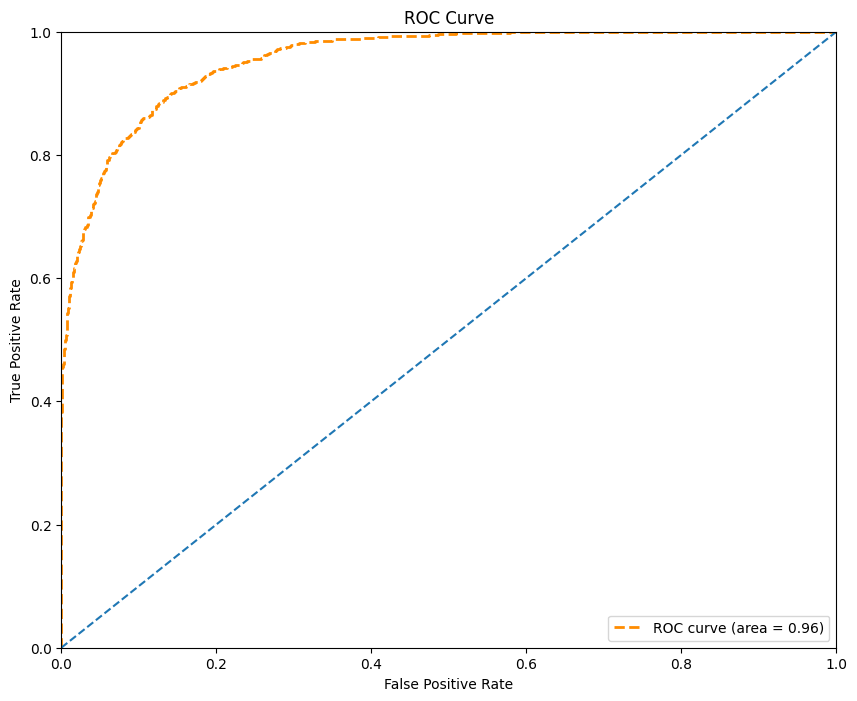

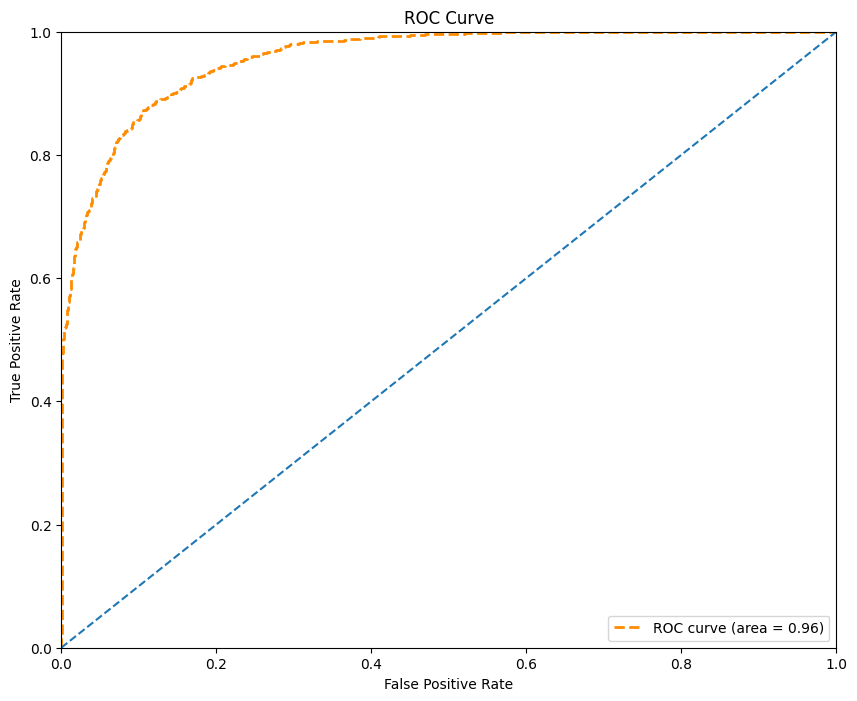

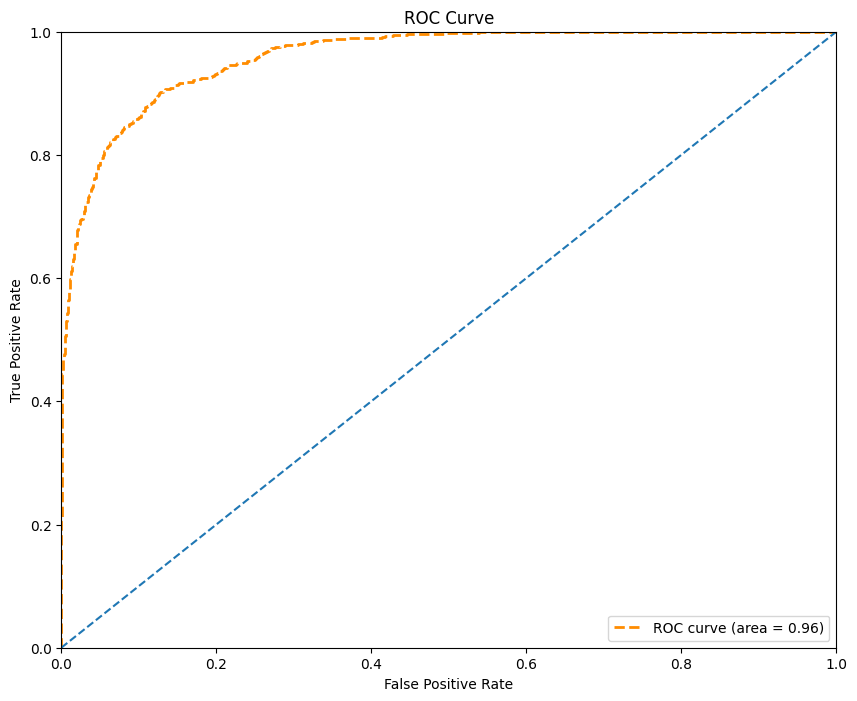

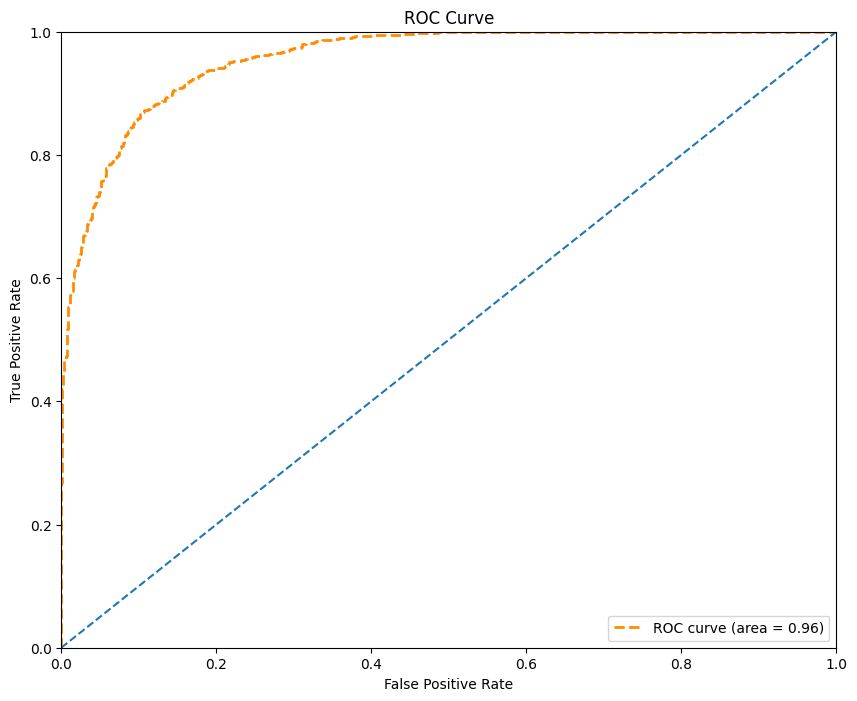

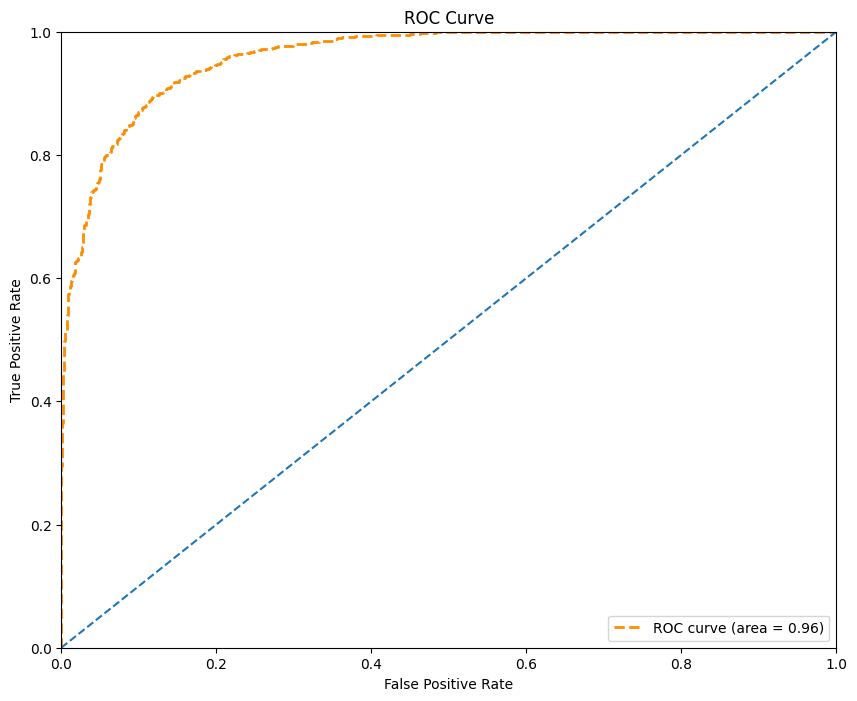

In [383]:
GBC_model = GradientBoostingClassifier

GBC_params = {
    'max_depth':[5,10,15],
    'criterion': ['friedman_mse']
}

Rst_GBC = training_GS(GBC_model, GBC_params, model_name = 'GBC', X_train = X_train_gbc, y_train = y_train, 
                      X_test = X_test_gbc, y_test = y_test, rst_path = rst_path_, print_scores = True, plot_ROC = True)


CATBoosting

In [391]:
X_train_cat

PRINTAMT      CRLIMIT  Duration  ntransaction_l12m  BRNAME_label  \
12667  890575.450 21690000.000    60.000              7.000           140   
10371       0.000 17150000.000    36.000              8.000           100   
9695        0.000 25380000.000    61.000              6.000            75   
8044        0.000 24480000.000    60.000              9.000            42   
11613       0.000   860300.000    12.000              5.000           125   
...           ...          ...       ...                ...           ...   
3772  2805314.140 49954176.110    59.000              7.000           107   
5191   334555.550 17700000.000    49.000              3.000           137   
5226  3058207.380 44129400.000    60.000             10.000           138   
5390  3946219.690 31500000.000    60.000              3.000           139   
860   1304746.300 20538000.000    60.000             11.000            28   

       DEALER_NAME_label    Age  state  CUSTOMERID  
12667                109 31.000      1 1985245.000  
10371                 58 41.000     14   41545.000  
9695                  98 44.000     12  245350.000  
8044                 109 32.000     12 1159814.000  
11613                  4 29.000      7  863542.000  
...                  ...    ...    ...         ...  
3772                  79 40.000     12  864323.000  
5191                  41 31.000      1  801869.000  
5226                  72 46.000      9 1682211.000  
5390                  80 31.000      9  241172.000  
860                    0 46.000     12  276246.000  

[11628 rows x 9 columns]

Streaming output truncated to the last 5000 lines.
4:	learn: 0.5968787	total: 1.9s	remaining: 6m 17s
5:	learn: 0.5812073	total: 2.28s	remaining: 6m 17s
6:	learn: 0.5651424	total: 2.66s	remaining: 6m 17s
7:	learn: 0.5496002	total: 3.03s	remaining: 6m 15s
8:	learn: 0.5365532	total: 3.41s	remaining: 6m 15s
9:	learn: 0.5218629	total: 3.79s	remaining: 6m 15s
10:	learn: 0.5086284	total: 4.17s	remaining: 6m 14s
11:	learn: 0.4972271	total: 4.55s	remaining: 6m 15s
12:	learn: 0.4850623	total: 4.92s	remaining: 6m 13s
13:	learn: 0.4749505	total: 5.31s	remaining: 6m 13s
14:	learn: 0.4629413	total: 5.67s	remaining: 6m 12s
15:	learn: 0.4538348	total: 6.05s	remaining: 6m 11s
16:	learn: 0.4425052	total: 6.43s	remaining: 6m 11s
17:	learn: 0.4340777	total: 6.81s	remaining: 6m 11s
18:	learn: 0.4236560	total: 7.19s	remaining: 6m 11s
19:	learn: 0.4157592	total: 7.57s	remaining: 6m 10s
20:	learn: 0.4081330	total: 7.95s	remaining: 6m 10s
21:	learn: 0.4009488	total: 8.58s	remaining: 6m 21s
22:	learn: 0.3948201

<ipython-input-375-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-375-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Streaming output truncated to the last 5000 lines.
4:	learn: 0.5909286	total: 2.08s	remaining: 6m 53s
5:	learn: 0.5742576	total: 2.48s	remaining: 6m 51s
6:	learn: 0.5588940	total: 2.91s	remaining: 6m 52s
7:	learn: 0.5441352	total: 3.32s	remaining: 6m 52s
8:	learn: 0.5294110	total: 3.74s	remaining: 6m 52s
9:	learn: 0.5171006	total: 4.16s	remaining: 6m 51s
10:	learn: 0.5041368	total: 4.56s	remaining: 6m 50s
11:	learn: 0.4934092	total: 4.98s	remaining: 6m 49s
12:	learn: 0.4827926	total: 5.41s	remaining: 6m 50s
13:	learn: 0.4732610	total: 5.82s	remaining: 6m 50s
14:	learn: 0.4624096	total: 6.24s	remaining: 6m 49s
15:	learn: 0.4521566	total: 6.74s	remaining: 6m 54s
16:	learn: 0.4425589	total: 7.42s	remaining: 7m 8s
17:	learn: 0.4342328	total: 8.06s	remaining: 7m 20s
18:	learn: 0.4252441	total: 8.78s	remaining: 7m 33s
19:	learn: 0.4170119	total: 9.43s	remaining: 7m 41s
20:	learn: 0.4092018	total: 9.83s	remaining: 7m 38s
21:	learn: 0.4014684	total: 10.2s	remaining: 7m 35s
22:	learn: 0.3952091

<ipython-input-375-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-375-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Streaming output truncated to the last 5000 lines.
4:	learn: 0.5956060	total: 2.75s	remaining: 9m 6s
5:	learn: 0.5786669	total: 3.43s	remaining: 9m 28s
6:	learn: 0.5639994	total: 4.04s	remaining: 9m 33s
7:	learn: 0.5486098	total: 4.44s	remaining: 9m 10s
8:	learn: 0.5341546	total: 4.85s	remaining: 8m 53s
9:	learn: 0.5207806	total: 5.26s	remaining: 8m 40s
10:	learn: 0.5078614	total: 5.68s	remaining: 8m 30s
11:	learn: 0.4961981	total: 6.09s	remaining: 8m 21s
12:	learn: 0.4856664	total: 6.5s	remaining: 8m 13s
13:	learn: 0.4759489	total: 6.92s	remaining: 8m 7s
14:	learn: 0.4650063	total: 7.34s	remaining: 8m 1s
15:	learn: 0.4543082	total: 7.75s	remaining: 7m 56s
16:	learn: 0.4440453	total: 8.16s	remaining: 7m 52s
17:	learn: 0.4358509	total: 8.56s	remaining: 7m 47s
18:	learn: 0.4267382	total: 8.98s	remaining: 7m 43s
19:	learn: 0.4185668	total: 9.4s	remaining: 7m 40s
20:	learn: 0.4116160	total: 9.83s	remaining: 7m 38s
21:	learn: 0.4043274	total: 10.2s	remaining: 7m 35s
22:	learn: 0.3979207	tot

<ipython-input-375-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-375-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Streaming output truncated to the last 5000 lines.
4:	learn: 0.5944698	total: 2.08s	remaining: 6m 54s
5:	learn: 0.5770325	total: 2.5s	remaining: 6m 55s
6:	learn: 0.5588181	total: 2.92s	remaining: 6m 53s
7:	learn: 0.5439192	total: 3.33s	remaining: 6m 53s
8:	learn: 0.5284002	total: 3.76s	remaining: 6m 54s
9:	learn: 0.5150565	total: 4.18s	remaining: 6m 54s
10:	learn: 0.5020344	total: 4.6s	remaining: 6m 53s
11:	learn: 0.4913899	total: 5.03s	remaining: 6m 53s
12:	learn: 0.4811258	total: 5.44s	remaining: 6m 53s
13:	learn: 0.4712161	total: 5.87s	remaining: 6m 53s
14:	learn: 0.4608096	total: 6.29s	remaining: 6m 53s
15:	learn: 0.4510660	total: 6.72s	remaining: 6m 53s
16:	learn: 0.4415985	total: 7.13s	remaining: 6m 52s
17:	learn: 0.4324041	total: 7.53s	remaining: 6m 50s
18:	learn: 0.4231103	total: 7.96s	remaining: 6m 50s
19:	learn: 0.4149314	total: 8.37s	remaining: 6m 50s
20:	learn: 0.4072689	total: 8.79s	remaining: 6m 49s
21:	learn: 0.4000855	total: 9.19s	remaining: 6m 48s
22:	learn: 0.3928356	

<ipython-input-375-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-375-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Streaming output truncated to the last 5000 lines.
4:	learn: 0.5935713	total: 2.08s	remaining: 6m 53s
5:	learn: 0.5769179	total: 2.49s	remaining: 6m 53s
6:	learn: 0.5610806	total: 2.91s	remaining: 6m 52s
7:	learn: 0.5454474	total: 3.33s	remaining: 6m 52s
8:	learn: 0.5317544	total: 3.75s	remaining: 6m 53s
9:	learn: 0.5179911	total: 4.18s	remaining: 6m 54s
10:	learn: 0.5049562	total: 4.6s	remaining: 6m 53s
11:	learn: 0.4927935	total: 5.02s	remaining: 6m 53s
12:	learn: 0.4800744	total: 5.44s	remaining: 6m 52s
13:	learn: 0.4700741	total: 5.87s	remaining: 6m 53s
14:	learn: 0.4585025	total: 6.27s	remaining: 6m 51s
15:	learn: 0.4488347	total: 6.7s	remaining: 6m 51s
16:	learn: 0.4382462	total: 7.12s	remaining: 6m 51s
17:	learn: 0.4303540	total: 7.55s	remaining: 6m 51s
18:	learn: 0.4209858	total: 7.97s	remaining: 6m 51s
19:	learn: 0.4131848	total: 8.39s	remaining: 6m 51s
20:	learn: 0.4055628	total: 8.81s	remaining: 6m 50s
21:	learn: 0.3986048	total: 9.23s	remaining: 6m 50s
22:	learn: 0.3925475	

<ipython-input-375-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-375-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Validation: 
B_acc:  88.2 ----------- std:  0.3
Spe:  85.2 ----------- std:  0.9
Sen:  91.1 ----------- std:  0.6
Test: 
B_acc:  89.5
Spe:  87.1
Sen:  91.8


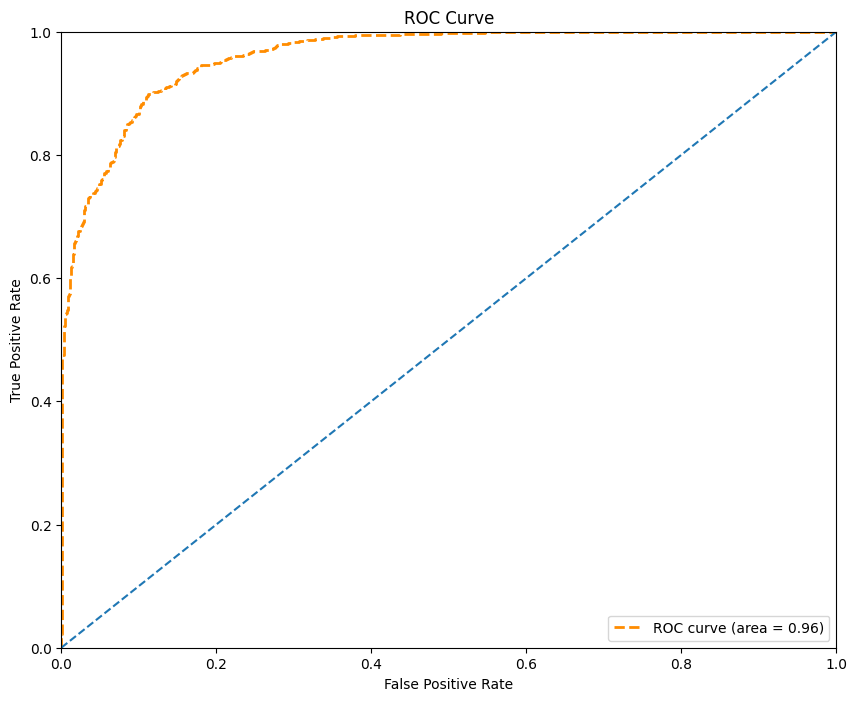

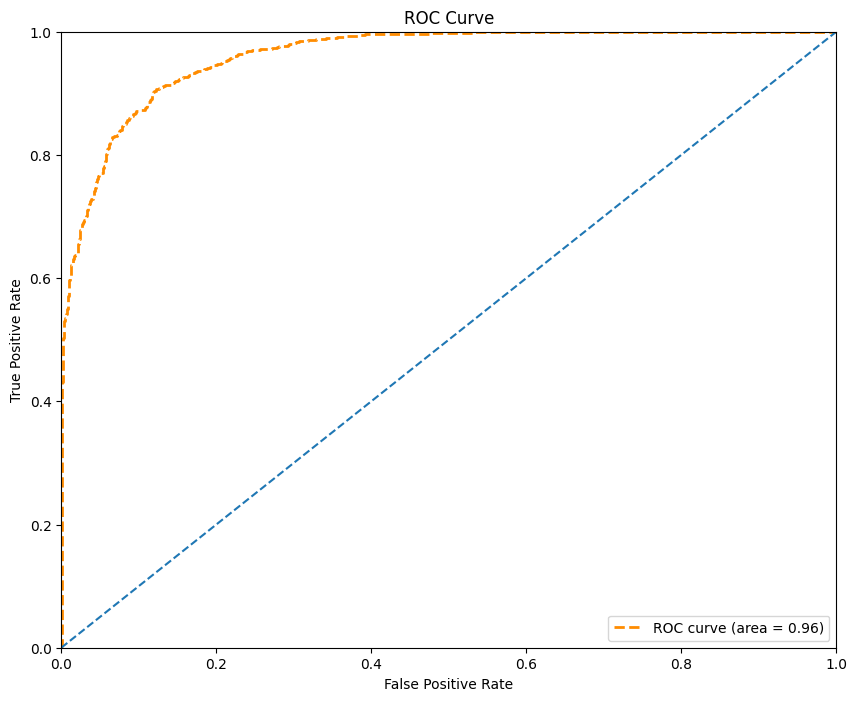

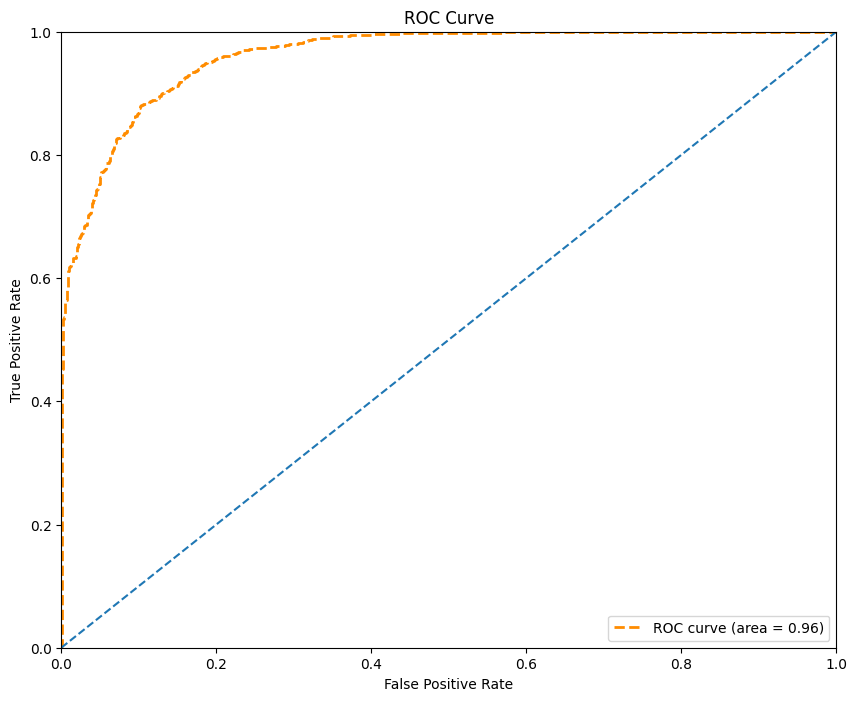

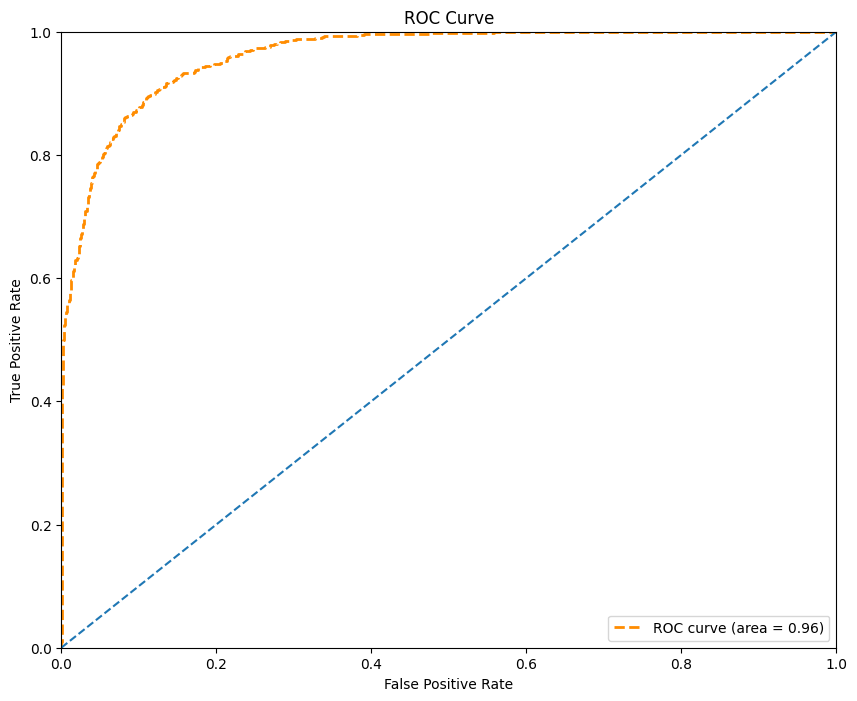

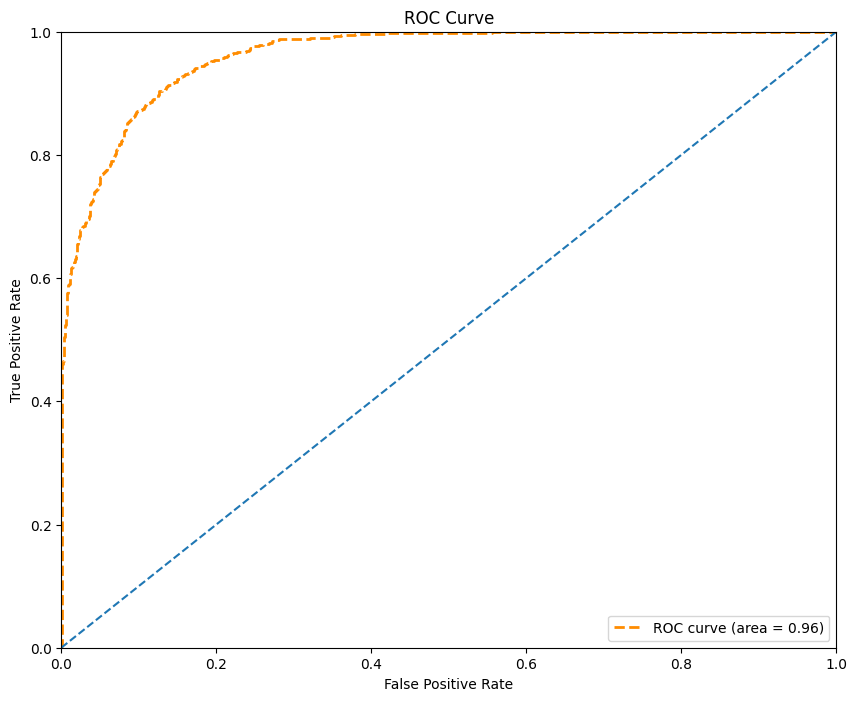

In [384]:
CAT_model = CatBoostClassifier
CAT_params = {
    'depth': [5,10,15],
}

Rst_CAT = training_GS(CAT_model, CAT_params, model_name = 'CAT', X_train = X_train_cat, y_train = y_train, 
                      X_test = X_test_cat, y_test = y_test, rst_path = rst_path_, print_scores = True, plot_ROC = True)

Logistic Regression

In [ ]:
feature_lg = [0,2,3]
X_train_lg = select_columns_by_index(X_train, feature_lg)
X_test_lg = select_columns_by_index(X_test, feature_lg)

In [ ]:
X_train_lg

CUSTOMERID      CRLIMIT    PRINTAMT
12667 1985245.000 21690000.000  890575.450
10371   41545.000 17150000.000       0.000
9695   245350.000 25380000.000       0.000
8044  1159814.000 24480000.000       0.000
11613  863542.000   860300.000       0.000
...           ...          ...         ...
3772   864323.000 49954176.110 2805314.140
5191   801869.000 17700000.000  334555.550
5226  1682211.000 44129400.000 3058207.380
5390   241172.000 31500000.000 3946219.690
860    276246.000 20538000.000 1304746.300

[11628 rows x 3 columns]

In [ ]:
A = {'X_test': X_test_lg,
     'y_test': y_test}
np.save('Result/test_lg.npy', A)

Fold_1


<ipython-input-68-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-68-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_2


<ipython-input-68-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-68-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_3


<ipython-input-68-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-68-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_4


<ipython-input-68-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-68-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_5


<ipython-input-68-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-68-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Validation: 
B_acc:  74.7 ----------- std:  0.5
Spe:  61.1 ----------- std:  0.3
Sen:  88.4 ----------- std:  1.0
Test: 
B_acc:  76.5
Spe:  63.3
Sen:  89.8


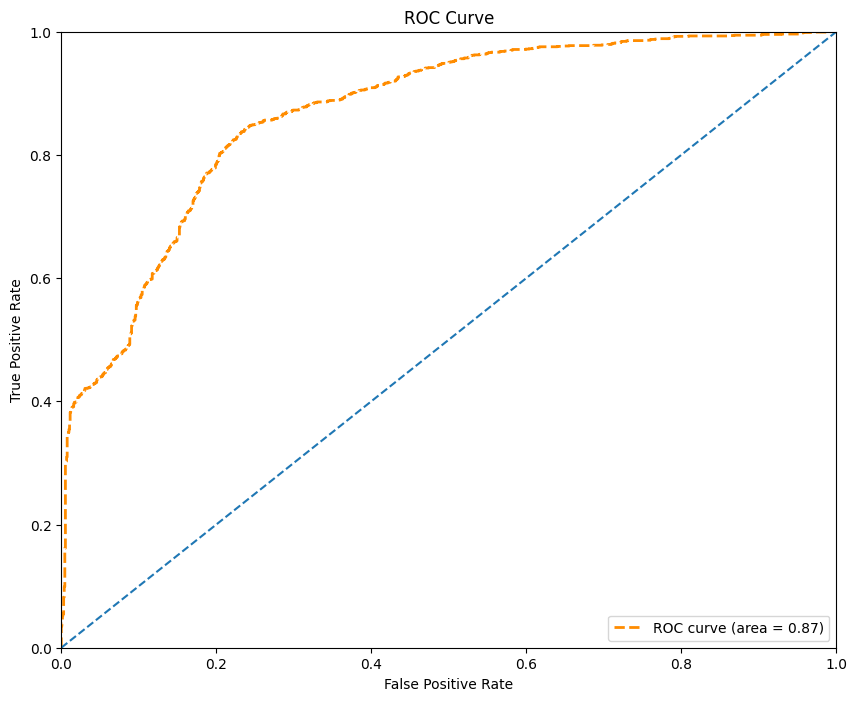

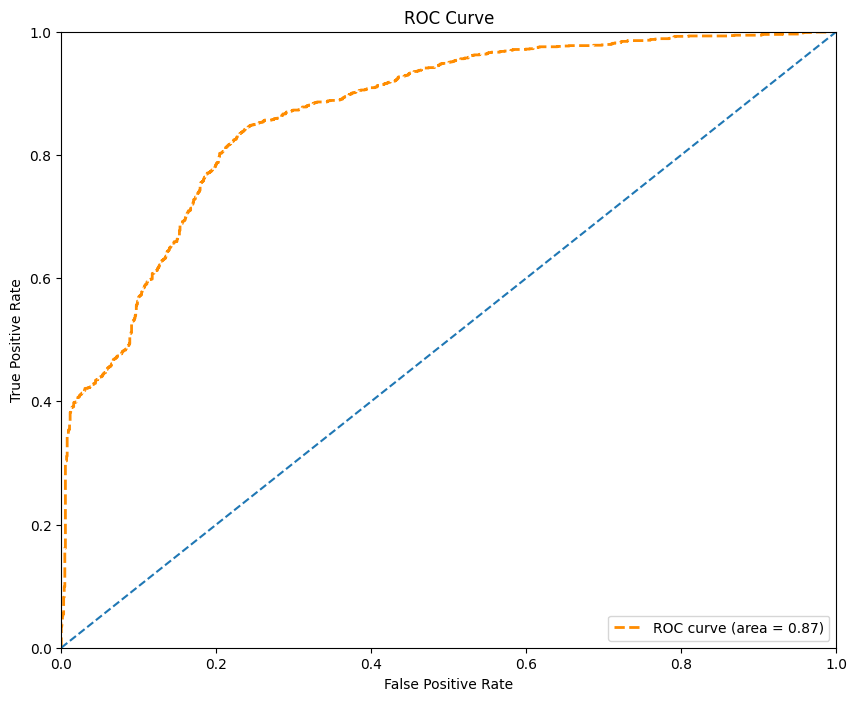

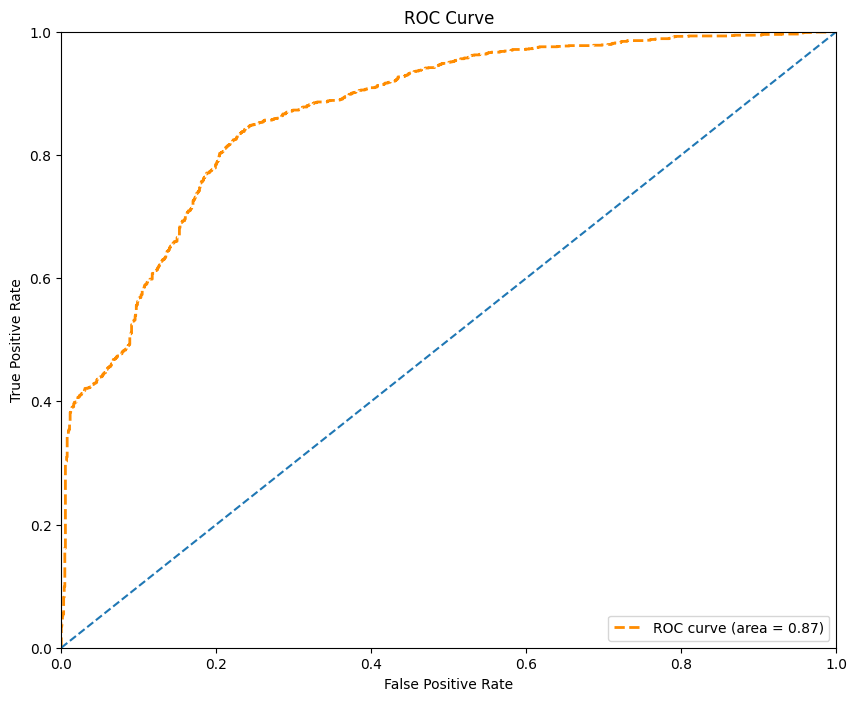

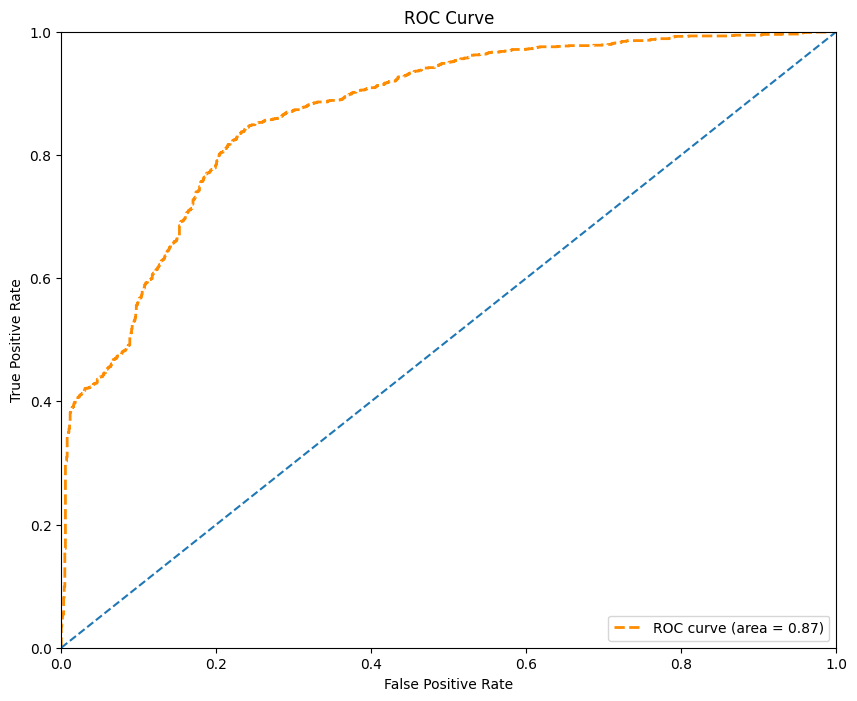

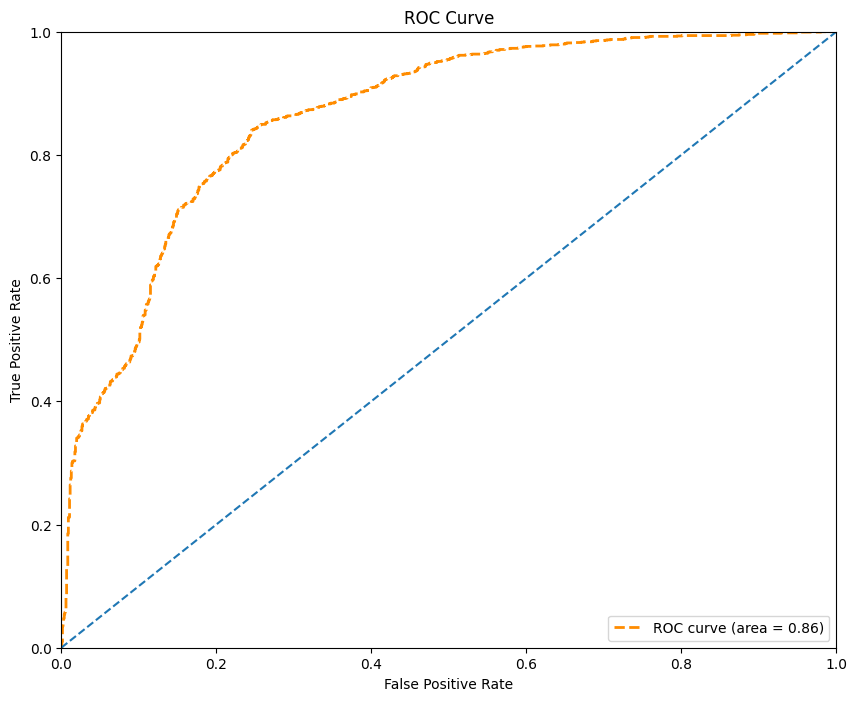

In [ ]:
LR_model = LogisticRegression
LR_params = {'penalty': ['l2'],
          'max_iter': [1000],
          'C': [100, 200, 300],
          'solver': ['lbfgs']}

Rst_LR = training_GS(LR_model, LR_params, model_name = 'LR', X_train = X_train_lg, y_train = y_train, 
                    X_test = X_test_lg, y_test = y_test, rst_path = rst_path_, print_scores = True, plot_ROC = True)


SVM

In [ ]:
feature_svm = [0,2,3]
X_train_svm = select_columns_by_index(X_train, feature_svm)
X_test_svm = select_columns_by_index(X_test, feature_svm)

In [ ]:
X_train_svm

CUSTOMERID      CRLIMIT    PRINTAMT
12667 1985245.000 21690000.000  890575.450
10371   41545.000 17150000.000       0.000
9695   245350.000 25380000.000       0.000
8044  1159814.000 24480000.000       0.000
11613  863542.000   860300.000       0.000
...           ...          ...         ...
3772   864323.000 49954176.110 2805314.140
5191   801869.000 17700000.000  334555.550
5226  1682211.000 44129400.000 3058207.380
5390   241172.000 31500000.000 3946219.690
860    276246.000 20538000.000 1304746.300

[11628 rows x 3 columns]

In [ ]:
A = {'X_test': X_test_svm,
     'y_test': y_test}
np.save('Result/test_svm.npy', A)

Fold_1


<ipython-input-68-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-68-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_2


<ipython-input-68-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-68-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_3


<ipython-input-68-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-68-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_4


<ipython-input-68-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-68-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Fold_5


<ipython-input-68-a5d46a658f30>:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "b-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
<ipython-input-68-a5d46a658f30>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)


Validation: 
B_acc:  77.7 ----------- std:  0.7
Spe:  71.5 ----------- std:  2.2
Sen:  83.8 ----------- std:  1.6
Test: 
B_acc:  79.5
Spe:  73.1
Sen:  85.8


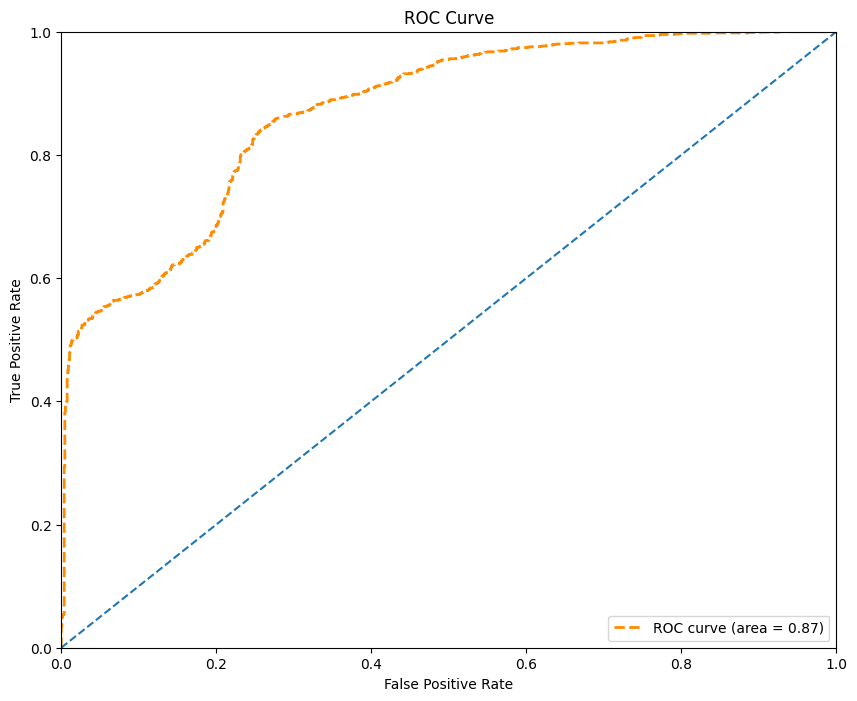

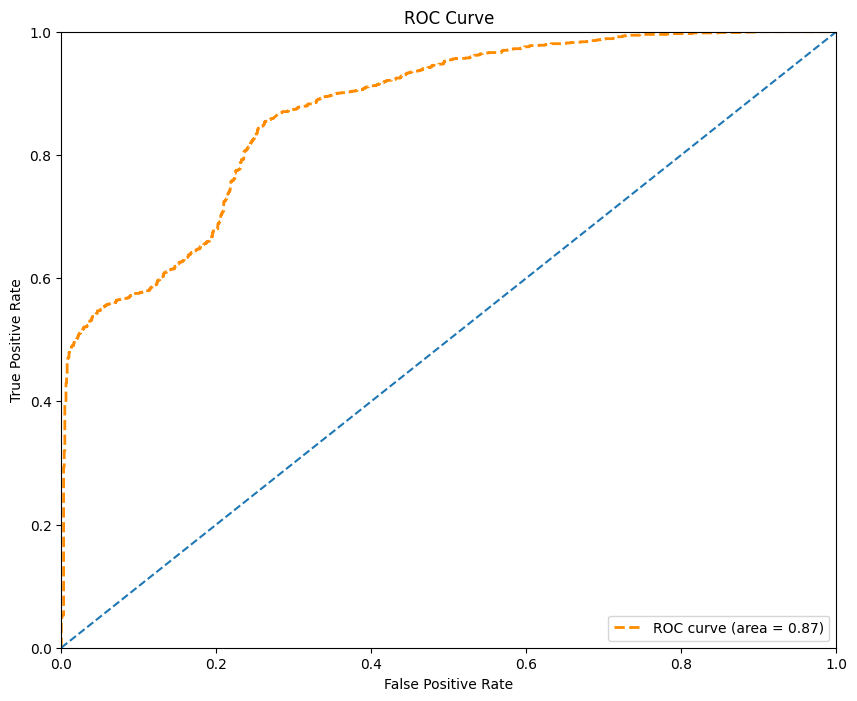

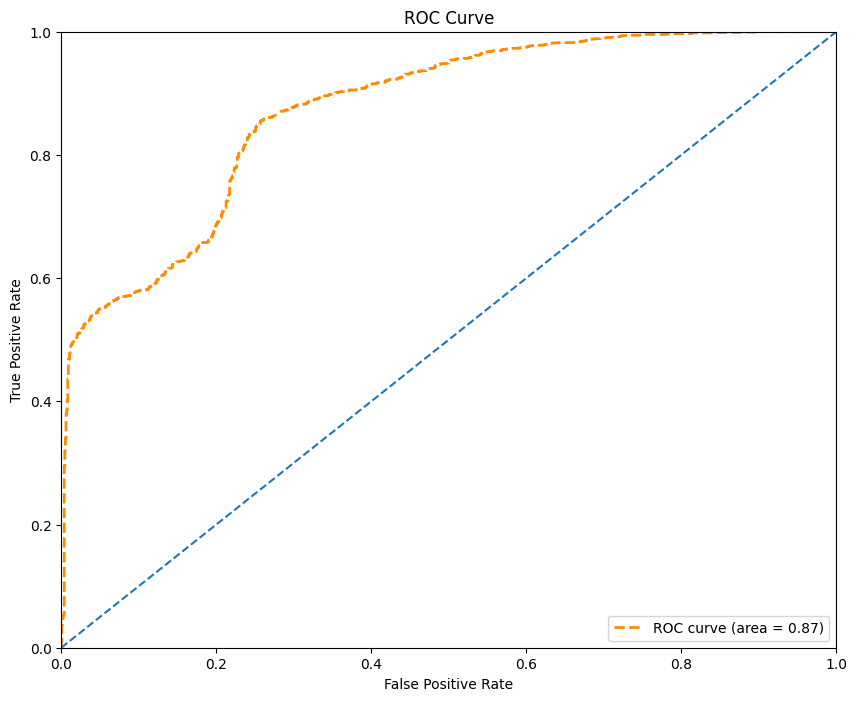

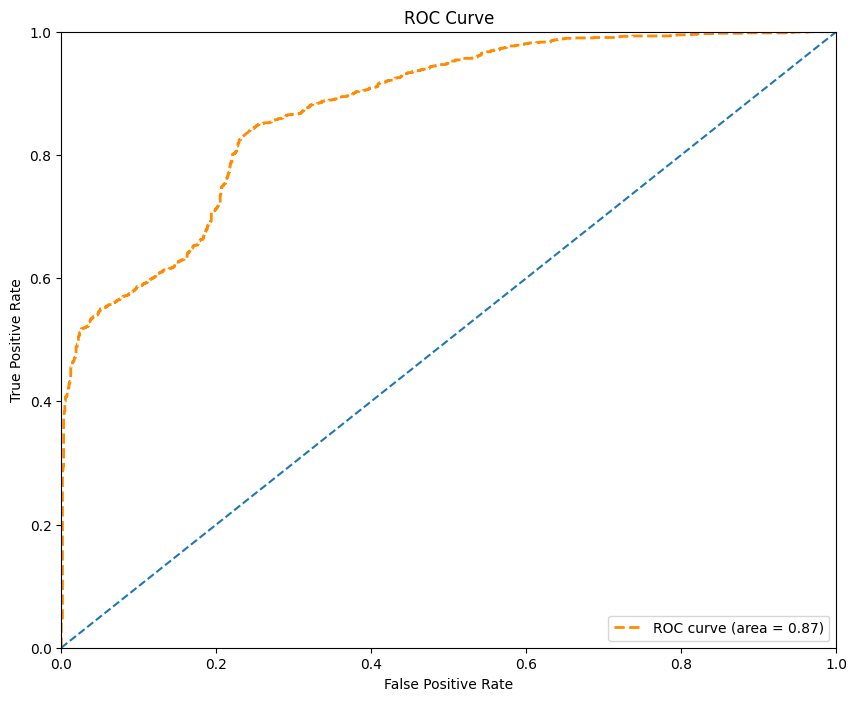

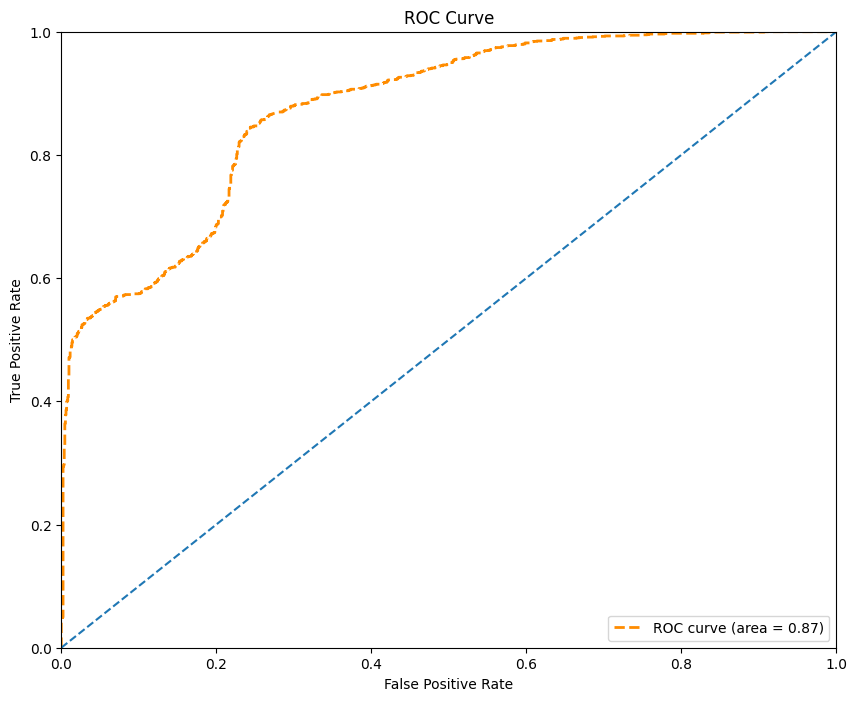

In [ ]:

svm_model = SVC
svm_params = [{'C': [100],
               'kernel': ['rbf']}]

Rst_SVM = training_GS(svm_model, svm_params, model_name = 'SVM', X_train = X_train_svm, y_train = y_train, 
                      X_test = X_test_svm, y_test = y_test, rst_path = rst_path_, print_scores = True, plot_ROC = True)
